### Importation de bibliothèque utiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


### Variables utilitaires

In [2]:
load_models = True # mettre sur True pour charger les modeles déjà entraîné
make_PCA = False # mettre sur True pour faire une PCA sur les données

# On a testé la PCA et elle offre de moins bons résultats, c'est pourquoi elle est sur False de base.
# On peut quand même la tester en mettant simplement make_PCA sur True

# Importation des Datasets

In [3]:
df_clubs = pd.read_csv("Clean/clubs_fr.csv") #liste des clubs français avec quelques stats
df_game_events = pd.read_csv("Clean/game_events.csv") #Un ensemble d’actions pour chaque joueur pendant chaque match
df_game_lu = pd.read_csv("Clean/game_lineups.csv") #La constitution des équipes pour chaque match
df_match_train = pd.read_csv("Clean/matchs_2013_2022.csv") #Les résultats de chaque match de 2013 à 2022 
df_player_appearance = pd.read_csv("Clean/player_appearance.csv") #ensemble d’info simple sur chaque joueur pendant chaque match (nombre de buts, nombre de cartons)
df_player_valuation_before_season = pd.read_csv("Clean/player_valuation_before_season.csv") #Pour chaque joueur, sa valeur sur le marché, à une certaine date
df_match_test = pd.read_csv("Clean/match_2023.csv") #Les résultats de chaque match de 2023 

C:\Users\maxim\AppData\Local\Temp\ipykernel_39648\1257750365.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_game_lu = pd.read_csv("Clean/game_lineups.csv") #La constitution des équipes pour chaque match | Quentin


# Première exploration des données

## Exploration df_clubs

In [4]:
df_clubs.head(10)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name
0,969,montpellier-hsc,Montpellier Hérault Sport Club,FR1,25,25.7,12,48.0,8,Stade de la Mosson,32939,+€28.60m,NaN
1,1082,losc-lille,Lille Olympique Sporting Club Lille Métropole,FR1,25,25.4,18,72.0,7,Decathlon Arena-Stade Pierre-Mauroy,50186,+€3.65m,NaN
2,1160,nimes-olympique,Nîmes Olympique,FR1,26,25.4,12,46.2,3,Stade des Antonins,8033,+€2.50m,NaN
3,3911,stade-brest-29,Stade brestois 29,FR1,24,26.0,6,25.0,3,Stade Francis-Le Blé,15220,+€5.10m,NaN
4,595,sc-bastia,SC Bastia,FR1,25,27.6,8,32.0,6,Stade Armand-Cesari,16480,+€480k,NaN
5,1158,fc-lorient,Football Club Lorient-Bretagne Sud,FR1,28,24.5,16,57.1,11,Stade du Moustoir,19010,+€30.30m,NaN
6,273,fc-stade-rennes,Stade Rennais Football Club,FR1,24,24.4,11,45.8,8,Roazhon Park,29778,+€62.10m,NaN
7,995,fc-nantes,Football Club de Nantes,FR1,25,26.5,13,52.0,9,Stade de la Beaujoire,37463,+€10.85m,NaN
8,2969,dijon-fco,Dijon FCO,FR1,29,25.8,14,48.3,4,Stade Gaston-Gérard,16098,+€1.50m,NaN
9,40,fc-girondins-bordeaux,FC Girondins Bordeaux,FR1,26,22.7,13,50.0,6,Matmut Atlantique,42115,+€12.70m,NaN


In [5]:
df_clubs.tail(10)

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name
25,1095,es-troyes-ac,ESTAC Troyes,FR1,29,23.1,16,57.1,5,Stade de l'Aube,21877,+-0,NaN
26,1420,sco-angers,Angers SCO,FR1,27,24.2,12,44.4,5,Stade Raymond Kopa,19350,+€3.50m,NaN
27,3524,clermont-foot-63,Clermont Foot 63,FR1,25,26.5,13,52.0,6,Stade Gabriel-Montpied,13000,+€8.90m,NaN
28,738,ac-le-havre,Le Havre Athletic Club,FR1,24,26.0,14,58.3,5,Stade Océane,25178,€-2.90m,NaN
29,1416,amiens-sc,Amiens SC,FR1,24,24.1,10,41.7,7,Stade Crédit Agricole la Licorne,12999,+€700k,NaN
30,826,rc-lens,Racing Club de Lens,FR1,27,26.3,14,51.9,12,Stade Bollaert-Delelis,38223,+€3.64m,NaN
31,415,fc-toulouse,Toulouse Football Club,FR1,27,23.5,21,77.8,11,Stadium Municipal,33150,€-4.05m,NaN
32,417,ogc-nizza,Olympique Gymnaste Club Nice Côte d'Azur,FR1,28,24.2,12,42.9,9,Allianz Riviera,36178,€-33.69m,NaN
33,290,aj-auxerre,AJ Auxerre,FR1,26,24.3,15,55.6,6,Stade de l'Abbé-Deschamps,18541,+-0,NaN
34,347,fc-metz,Football Club de Metz,FR1,28,25.1,21,75.0,9,Stade Saint-Symphorien,28786,+€23.70m,NaN


In [6]:
df_clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  35 non-null     int64  
 1   club_code                35 non-null     object 
 2   name                     35 non-null     object 
 3   domestic_competition_id  35 non-null     object 
 4   squad_size               35 non-null     int64  
 5   average_age              35 non-null     float64
 6   foreigners_number        35 non-null     int64  
 7   foreigners_percentage    35 non-null     float64
 8   national_team_players    35 non-null     int64  
 9   stadium_name             35 non-null     object 
 10  stadium_seats            35 non-null     int64  
 11  net_transfer_record      35 non-null     object 
 12  coach_name               0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 3.7+ KB


In [7]:
df_clubs.describe()

,club_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats,coach_name
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,0.0
mean,1502.885714,25.800000,25.208571,13.028571,49.968571,6.742857,26239.314286,NaN
std,2400.062594,4.085844,1.260572,5.043841,18.514696,4.320559,15002.331638,NaN
min,40.000000,5.000000,22.700000,1.000000,18.500000,0.000000,2500.000000,NaN
25%,589.000000,24.500000,24.300000,10.500000,42.300000,4.000000,16740.000000,NaN
50%,995.000000,26.000000,25.400000,13.000000,50.000000,6.000000,21684.000000,NaN
75%,1289.000000,28.000000,26.000000,16.000000,57.100000,9.000000,34664.000000,NaN
max,14171.000000,30.000000,27.600000,24.000000,100.000000,19.000000,67394.000000,NaN


In [8]:
df_clubs.describe(include='object')

,club_code,name,domestic_competition_id,stadium_name,net_transfer_record
count,35,35,35,35,35
unique,35,35,1,35,30
top,montpellier-hsc,Montpellier Hérault Sport Club,FR1,Stade de la Mosson,+-0
freq,1,1,35,1,6


<p> On voit que domestic_competition_id est une colonne constante, on peut la supprimer </p>

In [9]:
df_clubs.drop(columns=['domestic_competition_id'], inplace=True)

In [10]:
df_clubs.count()

club_id                  35
club_code                35
name                     35
squad_size               35
average_age              35
foreigners_number        35
foreigners_percentage    35
national_team_players    35
stadium_name             35
stadium_seats            35
net_transfer_record      35
coach_name                0
dtype: int64

In [11]:
df_clubs.nunique()

club_id                  35
club_code                35
name                     35
squad_size                8
average_age              25
foreigners_number        18
foreigners_percentage    30
national_team_players    14
stadium_name             35
stadium_seats            35
net_transfer_record      30
coach_name                0
dtype: int64

<p> On voit que le coach est toujours NaN donc on peut aussi supprimer cette colonne. </p>

In [12]:
df_clubs.drop(columns=['coach_name'], inplace=True)

## Exploration df_game_events

In [13]:
df_game_events.head(10)

,Unnamed: 0,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,6816,5d2b67957aaae6cf2a41e70cb5d4024f,2012-09-22,2223841,73,Substitutions,3911,5399,", Not reported",37516.0,NaN
1,6817,cd511880b945623db06ace57349e45b2,2012-09-22,2223841,76,Goals,3911,24459,", Penalty, 2. Goal of the Season Assist: , Fou...",NaN,24459.0
2,6818,8ca118538b45a24643ab1c9f76e50f6d,2012-09-22,2223841,56,Substitutions,3911,25113,", Not reported",22053.0,NaN
3,6819,aca68dc250aa9a3758fb2243ee679d9d,2012-09-22,2223841,88,Cards,1423,27490,1. Yellow card,NaN,NaN
4,6820,a133e4d7cdccb930f2dc7b4935754a30,2012-09-22,2223841,4,Cards,1423,43960,1. Yellow card,NaN,NaN
5,6821,9883c30317b9b0bffb2df9da78f4cd01,2012-09-22,2223841,46,Substitutions,1423,43960,", Not reported",36291.0,NaN
6,6822,cb04da1d66d24572e9abfe9c97a4690f,2012-09-22,2223841,40,Cards,3911,57349,1. Yellow card,NaN,NaN
7,6823,0eba639bc7cfa06ddb99a6155c269b2c,2012-09-22,2223841,61,Goals,3911,57349,", Left-footed shot, 2. Goal of the Season Assist:",NaN,NaN
8,6824,035962f1cfff0551f6aff99dac18ff35,2012-09-22,2223841,64,Substitutions,3911,57349,", Not reported",197857.0,NaN
9,6825,99c515088a81adc311f187eb65e72adb,2012-09-22,2223841,78,Substitutions,1423,57403,", Not reported",43975.0,NaN


In [14]:
df_game_events.tail(10)

,Unnamed: 0,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
40985,595174,13b0e45f9968d9a04f3a42d64967b8b7,2023-06-03,3840454,90,Substitutions,1082,113707,NaN,594991.0,NaN
40986,595175,fca1b836cdc28ef9676e3d792718c620,2023-06-03,3840454,72,Goals,1095,174694,", Left-footed shot, 7. Goal of the Season",NaN,NaN
40987,595176,48b7622610c731e5caa8e76783a8ee8d,2023-06-03,3840454,90,Substitutions,1095,174694,NaN,212804.0,NaN
40988,595177,257d811add0474181704d9506bfb891e,2023-06-03,3840454,75,Substitutions,1095,277635,NaN,917104.0,NaN
40989,595178,03b42ca6322b69a0b5591c1ac584cc8b,2023-06-03,3840454,46,Substitutions,1082,362108,NaN,370846.0,NaN
40990,595179,3207a9364b650453d83b09bdfbca7209,2023-06-03,3840454,81,Substitutions,1082,392770,NaN,973085.0,NaN
40991,595180,33e97c3325f710fcd0f8aa7e04cf55fd,2023-06-03,3840454,73,Substitutions,1082,400485,NaN,496857.0,NaN
40992,595181,245770e377b0e06e3d87cf3c3147ce33,2023-06-03,3840454,52,Goals,1082,463605,", Left-footed shot, 3. Goal of the Season",NaN,NaN
40993,595182,d2a2bfb139a9512db3283904b59b3f8c,2023-06-03,3840454,75,Substitutions,1095,554251,NaN,568702.0,NaN
40994,595183,6f0004f185acd75d8267cd8ea6d4ace6,2023-06-03,3840454,84,Substitutions,1095,709482,NaN,345748.0,NaN


In [15]:
df_game_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40995 entries, 0 to 40994
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40995 non-null  int64  
 1   game_event_id     40995 non-null  object 
 2   date              40995 non-null  object 
 3   game_id           40995 non-null  int64  
 4   minute            40995 non-null  int64  
 5   type              40995 non-null  object 
 6   club_id           40995 non-null  int64  
 7   player_id         40995 non-null  int64  
 8   description       19667 non-null  object 
 9   player_in_id      26092 non-null  float64
 10  player_assist_id  2268 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 3.4+ MB


In [16]:
df_game_events.describe()

,Unnamed: 0,game_id,minute,club_id,player_id,player_in_id,player_assist_id
count,40995.000000,4.099500e+04,40995.000000,40995.000000,4.099500e+04,2.609200e+04,2268.000000
mean,307584.648421,2.952782e+06,63.881620,1099.791267,2.000446e+05,2.502363e+05,112472.209436
std,183580.926979,5.265202e+05,21.248884,1783.839110,1.738279e+05,2.064070e+05,108848.192147
min,6816.000000,2.223841e+06,-1.000000,40.000000,6.500000e+01,6.500000e+01,65.000000
25%,164968.500000,2.482282e+06,53.000000,415.000000,5.886400e+04,8.020500e+04,36039.000000
50%,326504.000000,2.942827e+06,69.000000,855.000000,1.541710e+05,1.987280e+05,77828.000000
75%,460141.500000,3.394779e+06,80.000000,1147.000000,2.911100e+05,3.548868e+05,162459.250000
max,595183.000000,3.840454e+06,90.000000,14171.000000,1.108145e+06,1.108145e+06,629566.000000


In [17]:
df_game_events.describe(include='object')

,game_event_id,date,type,description
count,40995,40995,40995,19667
unique,40995,1176,3,1230
top,5d2b67957aaae6cf2a41e70cb5d4024f,2019-05-18,Substitutions,", Not reported"
freq,1,128,26105,4137


In [18]:
df_game_events.count()

Unnamed: 0          40995
game_event_id       40995
date                40995
game_id             40995
minute              40995
type                40995
club_id             40995
player_id           40995
description         19667
player_in_id        26092
player_assist_id     2268
dtype: int64

In [19]:
df_game_events.nunique()

Unnamed: 0          40995
game_event_id       40995
date                 1176
game_id              4077
minute                 91
type                    3
club_id                34
player_id            1941
description          1230
player_in_id         2124
player_assist_id      640
dtype: int64

In [20]:
pd.DataFrame(df_game_events['description'].unique())


,0
0,", Not reported"
1,", Penalty, 2. Goal of the Season Assist: , Fou..."
2,1. Yellow card
3,", Left-footed shot, 2. Goal of the Season Assist:"
4,", Left-footed shot, 1. Goal of the Season Assi..."
...,...
1226,", Counter attack goal, 19. Goal of the Season"
1227,", Left-footed shot, 25. Goal of the Season"
1228,", Right-footed shot, 27. Goal of the Season"
1229,", Tap-in, 19. Goal of the Season"


<p> Unnamed:0 fait doublon avec l'index, on peut le supprimer</p>

In [21]:
df_game_events.drop(columns=['Unnamed: 0'], inplace=True)

## Exploration df_game_lu

In [22]:
df_game_lu.head(10)

,Unnamed: 0,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,34475,be6532aeff4c40b06e6e0da142da7dd8,2013-08-24,2330825,4811,969,Hilton,starting_lineup,Centre-Back,4,1
1,34476,4b10516c5bf9b2dfac0435c7c2bbf872,2013-08-24,2330825,5303,969,Souleymane Camara,starting_lineup,Left Winger,19,0
2,34477,46552e9ff9777efa2e2d0df3a8147d87,2013-08-24,2330825,5614,750,Cédric Kanté,starting_lineup,Centre-Back,6,1
3,34478,9c10d07e15ca9a537576aa4c04511562,2013-08-24,2330825,5686,969,Laurent Pionnier,starting_lineup,Goalkeeper,1,0
4,34479,d6592bfd4c2c2f06a388086f8b0b714e,2013-08-24,2330825,17693,750,Sébastien Roudet,starting_lineup,Left Winger,18,0
5,34480,df08ae40f07524d7b8fc52dc67fc7fff,2013-08-24,2330825,18543,969,Víctor Montaño,starting_lineup,Centre-Forward,29,0
6,34481,db50f6b385e699b78ad8711f1b8e87b6,2013-08-24,2330825,23955,969,Joris Marveaux,starting_lineup,Defensive Midfield,6,0
7,34482,0a4efcc33b613abc0d2c7a0f4c9e67e3,2013-08-24,2330825,24105,750,Simon Pouplin,starting_lineup,Goalkeeper,16,0
8,34483,206c4ff4e9dc78a897451abbc164c224,2013-08-24,2330825,28987,750,Roy Contout,starting_lineup,Right Winger,11,0
9,34484,ede5fa14ed0874d73757e79f7661352e,2013-08-24,2330825,34026,969,Siaka Tiéné,starting_lineup,Left-Back,5,0


In [23]:
df_game_lu.tail(10)

,Unnamed: 0,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
137122,1963682,c089d807e70bb2ea83acc1608069a6be,2023-06-03,3840454,648020,1082,Alexsandro,starting_lineup,Centre-Back,4,0
137123,1963683,439653aa92873cf404b82a6a839d224e,2023-06-03,3840454,654415,1082,Alan Virginius,substitutes,Left Winger,26,0
137124,1963684,c48e6b91d169c86dfa7dbca169d02b04,2023-06-03,3840454,709482,1095,Thierno Baldé,starting_lineup,Right Midfield,18,0
137125,1963685,5439e99717ad09e6b7b8ed251907eed5,2023-06-03,3840454,743498,1095,Wilson Odobert,substitutes,Right Winger,29,0
137126,1963686,daa1d806e12d6e10434049a20144f00f,2023-06-03,3840454,917101,1095,Rudy Kohon,substitutes,Centre-Back,33,0
137127,1963687,ade757c794df293894dadc9718772432,2023-06-03,3840454,917104,1095,Derek Mazou-Sacko,substitutes,Central Midfield,28,0
137128,1963688,bc1f8607d3240a8ae1caad1c0bc77b55,2023-06-03,3840454,917120,1095,Tanguy Zoukrou,starting_lineup,Centre-Back,22,0
137129,1963689,f8ec3e99f6b92d3a9c5fd58f226d4fb6,2023-06-03,3840454,923831,1082,Leny Yoro,substitutes,Centre-Back,15,0
137130,1963690,6e0c6c598b740b452e02e026c136fac6,2023-06-03,3840454,973085,1082,Carlos Baleba,substitutes,Defensive Midfield,35,0
137131,1963691,34bbcbdfe31e55c0d250cac9f235cc61,2023-06-03,3840454,982863,1095,Kyliane Dong,substitutes,Right Winger,27,0


In [24]:
df_game_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137132 entries, 0 to 137131
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       137132 non-null  int64 
 1   game_lineups_id  137132 non-null  object
 2   date             137132 non-null  object
 3   game_id          137132 non-null  int64 
 4   player_id        137132 non-null  int64 
 5   club_id          137132 non-null  int64 
 6   player_name      137132 non-null  object
 7   type             137132 non-null  object
 8   position         137132 non-null  object
 9   number           137132 non-null  object
 10  team_captain     137132 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 11.5+ MB


In [25]:
df_game_lu.describe()

,Unnamed: 0,game_id,player_id,club_id,team_captain
count,1.371320e+05,1.371320e+05,1.371320e+05,137132.000000,137132.000000
mean,1.015302e+06,3.026945e+06,2.234200e+05,1040.203322,0.052198
std,5.960297e+05,4.800401e+05,1.926629e+05,1521.617063,0.222427
min,3.447500e+04,2.330825e+06,6.500000e+01,40.000000,0.000000
25%,5.378458e+05,2.609664e+06,6.326500e+04,415.000000,0.000000
50%,1.042542e+06,3.047440e+06,1.783130e+05,855.000000,0.000000
75%,1.468349e+06,3.394862e+06,3.278630e+05,1147.000000,0.000000
max,1.963691e+06,3.840454e+06,1.108145e+06,14171.000000,1.000000


In [26]:
df_game_lu.describe(include='object')

,game_lineups_id,date,player_name,type,position,number
count,137132,137132,137132,137132,137132,137132
unique,137132,1062,2600,2,16,141
top,be6532aeff4c40b06e6e0da142da7dd8,2021-09-22,Benoît Costil,starting_lineup,Centre-Back,10
freq,1,400,354,81312,23124,5074


In [27]:
df_game_lu.nunique()

Unnamed: 0         137132
game_lineups_id    137132
date                 1062
game_id              3696
player_id            2606
club_id                34
player_name          2600
type                    2
position               16
number                141
team_captain            2
dtype: int64

In [28]:
df_game_lu.count()

Unnamed: 0         137132
game_lineups_id    137132
date               137132
game_id            137132
player_id          137132
club_id            137132
player_name        137132
type               137132
position           137132
number             137132
team_captain       137132
dtype: int64

In [29]:
df_game_lu.drop(columns=['Unnamed: 0'], inplace=True)

## Exploration df_match_train

In [30]:
df_match_train.head(10)

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,results
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,Stade Geoffroy-Guichard,31952.0,Antony Gautier,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,domestic_league,0
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,Parc des Sports d’Annecy,8620.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,domestic_league,-1
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,Stade du Hainaut,14874.0,Bartolomeu Varela,4-4-2 double 6,4-3-1-2,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,0:1,domestic_league,-1
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,Roazhon Park,13391.0,Benoît Millot,4-3-3 Attacking,4-2-3-1,Stade Rennais Football Club,Thonon Évian Grand Genève FC,0:0,domestic_league,0
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,Stade François-Coty,5981.0,Benoît Bastien,4-1-4-1,4-3-3 Defending,AC Ajaccio,Stade Rennais Football Club,3:1,domestic_league,1
5,17,2331094,2013,28. Matchday,2014-03-07,244,417,0,1,6.0,...,Orange Vélodrome,36083.0,Laurent Duhamel,4-3-1-2,4-2-3-1,Olympique de Marseille,Olympique Gymnaste Club Nice Côte d'Azur,0:1,domestic_league,-1
6,18,2331101,2013,28. Matchday,2014-03-09,40,1041,1,2,8.0,...,Matmut Atlantique,17660.0,Antony Gautier,4-3-3 Defending,5-3-2,FC Girondins Bordeaux,Olympique Lyonnais,1:2,domestic_league,-1
7,19,2331107,2013,31. Matchday,2014-03-29,750,244,1,1,19.0,...,Stade Auguste-Bonal,16328.0,Bartolomeu Varela,4-4-2 double 6,4-3-3 Attacking,FC Sochaux-Montbéliard,Olympique de Marseille,1:1,domestic_league,0
8,20,2331110,2013,31. Matchday,2014-03-28,417,583,0,1,11.0,...,Allianz Riviera,35030.0,Said Ennjimi,4-2-3-1,4-3-3 Attacking,Olympique Gymnaste Club Nice Côte d'Azur,Paris Saint-Germain Football Club,0:1,domestic_league,-1
9,21,2331123,2013,34. Matchday,2014-04-20,1423,995,2,6,19.0,...,Stade du Hainaut,13972.0,Alexandre Castro,4-3-3 Attacking,4-3-3 Defending,Valenciennes FC,Football Club de Nantes,2:6,domestic_league,-1


In [31]:
df_match_train.tail(10)

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,results
4068,66063,2331063,2013,29. Matchday,2014-03-15,1147,855,1,2,20.0,...,Stade François-Coty,6018.0,Ruddy Buquet,3-5-2 flat,4-4-2 double 6,AC Ajaccio,EA Guingamp,1:2,domestic_league,-1
4069,66064,2331129,2013,33. Matchday,2014-04-12,14171,595,2,1,16.0,...,Parc des Sports d’Annecy,11633.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,SC Bastia,2:1,domestic_league,1
4070,66065,2331185,2013,1. Matchday,2013-08-09,969,583,1,1,11.0,...,Stade de la Mosson,27717.0,Lionel Jaffredo,4-3-3 Defending,4-4-2 double 6,Montpellier Hérault Sport Club,Paris Saint-Germain Football Club,1:1,domestic_league,0
4071,66068,2482334,2014,23. Matchday,2015-02-01,1162,618,1,0,15.0,...,Stade Michel-d'Ornano,19432.0,Bartolomeu Varela,4-1-4-1,4-1-4-1,SM Caen,AS Saint-Étienne,1:0,domestic_league,1
4072,66079,2735509,2016,23. Matchday,2017-02-04,855,1162,0,1,8.0,...,Stade du Roudourou,14428.0,Johan Hamel,4-3-3 Attacking,5-4-1,EA Guingamp,SM Caen,0:1,domestic_league,-1
4073,66083,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,...,Matmut Atlantique,34554.0,Benoît Millot,3-4-3,3-5-2 flat,FC Girondins Bordeaux,Association sportive de Monaco Football Club,2:1,domestic_league,1
4074,67000,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,...,Stade de la Meinau,NaN,Jérôme Miguelgorry,4-4-2 Diamond,4-3-3 Attacking,Racing Club de Strasbourg Alsace,Montpellier Hérault Sport Club,2:3,domestic_league,-1
4075,67467,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,...,Stadium Municipal,15465.0,Hakim Ben El Hadj,5-4-1,5-3-2,Toulouse Football Club,Racing Club de Strasbourg Alsace,1:2,domestic_league,-1
4076,67720,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,...,Stade Louis-II,4800.0,Eric Wattellier,4-3-3 Attacking,5-3-2,Association sportive de Monaco Football Club,Racing Club de Strasbourg Alsace,1:3,domestic_league,-1
4077,67721,3394685,2020,13. Matchday,2020-12-06,40,3911,1,0,10.0,...,Matmut Atlantique,NaN,Frank Schneider,4-4-2 double 6,4-4-2 double 6,FC Girondins Bordeaux,Stade brestois 29,1:0,domestic_league,1


In [32]:
df_match_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4078 non-null   int64  
 1   game_id                 4078 non-null   int64  
 2   season                  4078 non-null   int64  
 3   round                   4078 non-null   object 
 4   date                    4078 non-null   object 
 5   home_club_id            4078 non-null   int64  
 6   away_club_id            4078 non-null   int64  
 7   home_club_goals         4078 non-null   int64  
 8   away_club_goals         4078 non-null   int64  
 9   home_club_position      4078 non-null   float64
 10  away_club_position      4078 non-null   float64
 11  home_club_manager_name  4078 non-null   object 
 12  away_club_manager_name  4078 non-null   object 
 13  stadium                 4078 non-null   object 
 14  attendance              3741 non-null   

In [33]:
df_match_train.nunique()

Unnamed: 0                4078
game_id                   4078
season                      11
round                       38
date                      1176
home_club_id                34
away_club_id                34
home_club_goals             10
away_club_goals              9
home_club_position          20
away_club_position          20
home_club_manager_name     126
away_club_manager_name     129
stadium                     41
attendance                3476
referee                     57
home_club_formation         28
away_club_formation         28
home_club_name              34
away_club_name              34
aggregate                   48
competition_type             1
results                      3
dtype: int64

<p> competition_type est constante, on peut la drop </p>

In [34]:
df_match_train.drop(columns=['competition_type'], inplace=True)
df_match_train.drop(columns=['Unnamed: 0'], inplace=True)

In [35]:
df_match_train.describe()

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,results
count,4.078000e+03,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,3741.000000,4078.000000
mean,2.935466e+06,2016.950466,1095.466160,1094.685140,1.475969,1.143698,10.374448,10.630701,21444.918204,0.146886
std,5.068788e+05,3.186078,1730.980074,1731.133943,1.267037,1.116886,5.760769,5.769632,13117.601011,0.845861
min,2.223841e+06,2012.000000,40.000000,40.000000,0.000000,0.000000,1.000000,1.000000,500.000000,-1.000000
25%,2.482368e+06,2014.000000,415.000000,415.000000,1.000000,0.000000,5.000000,6.000000,12125.000000,-1.000000
50%,2.942690e+06,2017.000000,855.000000,855.000000,1.000000,1.000000,10.000000,11.000000,16782.000000,0.000000
75%,3.394684e+06,2020.000000,1158.000000,1158.000000,2.000000,2.000000,15.000000,16.000000,28324.000000,1.000000
max,3.840454e+06,2022.000000,14171.000000,14171.000000,9.000000,9.000000,20.000000,20.000000,70785.000000,1.000000


In [36]:
df_match_train.describe(include='object')

,round,date,home_club_manager_name,away_club_manager_name,stadium,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate
count,4078,4078,4078,4078,4078,4078,3696,3696,4078,4078,4078
unique,38,1176,126,129,41,57,28,28,34,34,48
top,8. Matchday,2016-12-21,Christophe Galtier,Christophe Galtier,Decathlon Arena-Stade Pierre-Mauroy,Ruddy Buquet,4-2-3-1,4-2-3-1,Lille Olympique Sporting Club Lille Métropole,Montpellier Hérault Sport Club,1:1
freq,110,10,196,193,205,223,1082,1018,205,204,526


In [37]:
numeric_columns = df_match_train.select_dtypes(include=[np.number])
correlation_table = numeric_columns.corr()
correlation_table

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,results
game_id,1.000000,0.994613,-0.073932,-0.074094,0.017540,0.075746,0.005728,-0.005589,0.039172,-0.038518
season,0.994613,1.000000,-0.083840,-0.084085,0.017994,0.072514,0.004980,-0.004718,0.038473,-0.037163
home_club_id,-0.073932,-0.083840,1.000000,-0.029921,-0.050096,0.044893,0.234411,-0.024855,-0.203569,-0.063275
away_club_id,-0.074094,-0.084085,-0.029921,1.000000,0.044721,-0.061780,-0.030703,0.238255,-0.036681,0.080797
home_club_goals,0.017540,0.017994,-0.050096,0.044721,1.000000,-0.086822,-0.334554,0.281564,0.167848,0.631402
away_club_goals,0.075746,0.072514,0.044893,-0.061780,-0.086822,1.000000,0.257990,-0.295657,-0.059865,-0.632213
home_club_position,0.005728,0.004980,0.234411,-0.030703,-0.334554,0.257990,1.000000,-0.140522,-0.486814,-0.395606
away_club_position,-0.005589,-0.004718,-0.024855,0.238255,0.281564,-0.295657,-0.140522,1.000000,-0.066704,0.392833
attendance,0.039172,0.038473,-0.203569,-0.036681,0.167848,-0.059865,-0.486814,-0.066704,1.000000,0.122904
results,-0.038518,-0.037163,-0.063275,0.080797,0.631402,-0.632213,-0.395606,0.392833,0.122904,1.000000


## Exploration df_player_appearance

In [38]:
df_player_appearance.head(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2229837_108830,2229837,108830,415,3205,2012-08-10,Aymen Abdennour,FR1,1,0,0,0,90
1,2229837_113707,2229837,113707,969,1082,2012-08-10,Rémy Cabella,FR1,1,0,0,0,42
2,2229837_126767,2229837,126767,415,3205,2012-08-10,Ali Ahamada,FR1,0,0,0,0,90
3,2229837_126796,2229837,126796,415,60949,2012-08-10,Adrien Regattin,FR1,0,1,0,0,11
4,2229837_127032,2229837,127032,415,141,2012-08-10,Serge Aurier,FR1,0,1,0,1,84
5,2229837_127160,2229837,127160,969,1421,2012-08-10,Benjamin Stambouli,FR1,0,0,0,0,90
6,2229837_139955,2229837,139955,969,969,2012-08-10,Emanuel Herrera,FR1,0,0,0,0,56
7,2229837_146854,2229837,146854,415,162,2012-08-10,Wissam Ben Yedder,FR1,0,0,1,0,45
8,2229837_22386,2229837,22386,969,969,2012-08-10,Daniel Congré,FR1,0,0,0,0,90
9,2229837_23938,2229837,23938,969,969,2012-08-10,Geoffrey Jourdren,FR1,0,0,0,0,90


In [39]:
df_player_appearance.tail(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
115172,3840454_533738,3840454,533738,1082,1082,2023-06-03,Jonathan David,FR1,0,0,0,0,90
115173,3840454_554251,3840454,554251,1095,350,2023-06-03,Yasser Larouci,FR1,0,0,0,0,75
115174,3840454_568702,3840454,568702,1095,1095,2023-06-03,Papa Ndiaga Yade,FR1,0,0,0,0,15
115175,3840454_594991,3840454,594991,1082,738,2023-06-03,Mohamed Bayo,FR1,0,0,0,0,1
115176,3840454_648020,3840454,648020,1082,1082,2023-06-03,Alexsandro,FR1,0,0,0,0,90
115177,3840454_709482,3840454,709482,1095,1095,2023-06-03,Thierno Baldé,FR1,0,0,0,1,84
115178,3840454_84301,3840454,84301,1082,1082,2023-06-03,Benjamin André,FR1,1,0,0,0,90
115179,3840454_917104,3840454,917104,1095,1095,2023-06-03,Derek Mazou-Sacko,FR1,0,0,0,0,15
115180,3840454_917120,3840454,917120,1095,1095,2023-06-03,Tanguy Zoukrou,FR1,0,0,0,0,90
115181,3840454_973085,3840454,973085,1082,1237,2023-06-03,Carlos Baleba,FR1,0,0,0,0,9


In [40]:
df_player_appearance.nunique()

appearance_id             115182
game_id                     4078
player_id                   2330
player_club_id                34
player_current_club_id       288
date                        1176
player_name                 2324
competition_id                 1
yellow_cards                   3
red_cards                      2
goals                          6
assists                        5
minutes_played                90
dtype: int64

In [41]:
df_player_appearance.drop(columns=['competition_id'], inplace=True) #toutes les valeurs sont identiques

In [42]:
df_player_appearance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115182 entries, 0 to 115181
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   appearance_id           115182 non-null  object
 1   game_id                 115182 non-null  int64 
 2   player_id               115182 non-null  int64 
 3   player_club_id          115182 non-null  int64 
 4   player_current_club_id  115182 non-null  int64 
 5   date                    115182 non-null  object
 6   player_name             115182 non-null  object
 7   yellow_cards            115182 non-null  int64 
 8   red_cards               115182 non-null  int64 
 9   goals                   115182 non-null  int64 
 10  assists                 115182 non-null  int64 
 11  minutes_played          115182 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 10.5+ MB


In [43]:
df_player_appearance.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.151820e+05,1.151820e+05,115182.000000,115182.000000,115182.000000,115182.000000,115182.000000,115182.000000,115182.000000
mean,2.952633e+06,1.967233e+05,1093.133241,1866.226841,0.128857,0.005860,0.089571,0.067676,69.538053
std,5.119037e+05,1.759542e+05,1708.715521,5025.418754,0.344296,0.076328,0.317745,0.268173,29.745996
min,2.223841e+06,6.500000e+01,40.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.482400e+06,5.734200e+04,415.000000,398.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,2.942744e+06,1.470430e+05,855.000000,903.000000,0.000000,0.000000,0.000000,0.000000,90.000000
75%,3.394741e+06,2.905320e+05,1158.000000,1162.000000,0.000000,0.000000,0.000000,0.000000,90.000000
max,3.840454e+06,1.108145e+06,14171.000000,68608.000000,2.000000,1.000000,5.000000,4.000000,90.000000


In [44]:
df_player_appearance.describe(include='object')

,appearance_id,date,player_name
count,115182,115182,115182
unique,115182,1176,2324
top,2229837_108830,2020-12-16,Anthony Lopes
freq,1,314,346


## Exploration df_player_valuation_before_season

In [45]:
df_player_valuation_before_season.head(10)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,773,2004-10-04,3500000,14171,FR1
1,1327,2004-10-04,4000000,1159,FR1
2,1423,2004-10-04,1000000,855,FR1
3,1572,2004-10-04,1000000,162,FR1
4,1613,2004-10-04,200000,855,FR1
5,1667,2004-10-04,200000,162,FR1
6,2878,2004-10-04,200000,750,FR1
7,3115,2004-10-04,2500000,40,FR1
8,3139,2004-10-04,40000000,583,FR1
9,3266,2004-10-04,1000000,1158,FR1


In [46]:
df_player_valuation_before_season.tail(10)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
30205,691316,2023-07-25,6000000,244,FR1
30206,713787,2023-07-25,2000000,826,FR1
30207,743598,2023-07-25,13000000,667,FR1
30208,743600,2023-07-25,15000000,667,FR1
30209,872171,2023-07-25,6000000,583,FR1
30210,478872,2023-07-27,500000,618,FR1
30211,550862,2023-07-27,450000,1420,FR1
30212,363717,2023-07-28,150000,1162,FR1
30213,396131,2023-07-28,150000,1421,FR1
30214,696598,2023-07-28,300000,417,FR1


In [47]:
df_player_valuation_before_season.nunique()

player_id                              2011
date                                   2326
market_value_in_eur                     209
current_club_id                          35
player_club_domestic_competition_id       1
dtype: int64

In [48]:
df_player_valuation_before_season.drop(columns=['player_club_domestic_competition_id'], inplace=True) #toutes les valeurs sont identiques

In [49]:
df_player_valuation_before_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30215 entries, 0 to 30214
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   player_id            30215 non-null  int64 
 1   date                 30215 non-null  object
 2   market_value_in_eur  30215 non-null  int64 
 3   current_club_id      30215 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 944.3+ KB


In [50]:
df_player_valuation_before_season.describe()

,player_id,market_value_in_eur,current_club_id
count,3.021500e+04,3.021500e+04,30215.000000
mean,2.151680e+05,3.258903e+06,1281.302168
std,2.105213e+05,8.973152e+06,1972.929773
min,7.730000e+02,1.000000e+04,40.000000
25%,5.136900e+04,4.000000e+05,417.000000
50%,1.492390e+05,9.000000e+05,969.000000
75%,3.247990e+05,2.500000e+06,1160.000000
max,1.111912e+06,2.000000e+08,14171.000000


In [51]:
df_player_valuation_before_season.describe(include='object')

,date
count,30215
unique,2326
top,2020-04-08
freq,861


## Exploration du fichier test

In [52]:
df_match_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 270 non-null    int64  
 1   date                    270 non-null    object 
 2   home_club_id            270 non-null    int64  
 3   away_club_id            270 non-null    int64  
 4   home_club_manager_name  270 non-null    object 
 5   away_club_manager_name  270 non-null    object 
 6   stadium                 270 non-null    object 
 7   attendance              266 non-null    float64
 8   referee                 270 non-null    object 
 9   home_club_name          270 non-null    object 
 10  away_club_name          270 non-null    object 
 11  competition_type        270 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 25.4+ KB


In [53]:
df_match_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 4078 non-null   int64  
 1   season                  4078 non-null   int64  
 2   round                   4078 non-null   object 
 3   date                    4078 non-null   object 
 4   home_club_id            4078 non-null   int64  
 5   away_club_id            4078 non-null   int64  
 6   home_club_goals         4078 non-null   int64  
 7   away_club_goals         4078 non-null   int64  
 8   home_club_position      4078 non-null   float64
 9   away_club_position      4078 non-null   float64
 10  home_club_manager_name  4078 non-null   object 
 11  away_club_manager_name  4078 non-null   object 
 12  stadium                 4078 non-null   object 
 13  attendance              3741 non-null   float64
 14  referee                 4078 non-null   

<p> On voit que dans le fichier test nous avons beaucoup moins d'information</p>

In [54]:
columns_not_in_test = set(df_match_train.columns) - set(df_match_test.columns)

print("Columns not in df_match_test:", columns_not_in_test)


Columns not in df_match_test: {'away_club_formation', 'aggregate', 'season', 'round', 'home_club_goals', 'away_club_position', 'home_club_formation', 'results', 'away_club_goals', 'home_club_position'}


# Création de features

## Dataset : df_match_train

### On va créer des notes pour chaque manager pour voir leur impact sur les matchs.

In [55]:
df_match_train.columns

Index(['game_id', 'season', 'round', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'results'],
      dtype='object')

In [56]:
df_match_train.head(5)

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,results
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,Frédéric Hantz,Stade Geoffroy-Guichard,31952.0,Antony Gautier,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,0
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,Jocelyn Gourvennec,Parc des Sports d’Annecy,8620.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,-1
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,René Girard,Stade du Hainaut,14874.0,Bartolomeu Varela,4-4-2 double 6,4-3-1-2,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,0:1,-1
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,Pascal Dupraz,Roazhon Park,13391.0,Benoît Millot,4-3-3 Attacking,4-2-3-1,Stade Rennais Football Club,Thonon Évian Grand Genève FC,0:0,0
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,Philippe Montanier,Stade François-Coty,5981.0,Benoît Bastien,4-1-4-1,4-3-3 Defending,AC Ajaccio,Stade Rennais Football Club,3:1,1


### La note d'un manager est la moyenne des résultats de son équipe par saison

In [57]:
df_notes_manager_home = df_match_train.groupby(["home_club_id", "season", "home_club_manager_name"]).sum().loc[:, ["results"]].groupby("home_club_manager_name").mean().sort_values(by="results", ascending=False)
df_notes_manager_home

,results
home_club_manager_name,
Unai Emery,14.500000
Laurent Blanc,11.500000
Paulo Fonseca,11.000000
Carlo Ancelotti,11.000000
Thomas Tuchel,10.666667
...,...
Patrick Kisnorbo,-6.000000
Fabien Mercadal,-6.000000
Jérôme Arpinon,-7.000000


In [58]:
df_notes_manager_away = df_match_train.groupby(["away_club_id", "season", "away_club_manager_name"]).sum().loc[:, ["results"]].groupby("away_club_manager_name").mean()
df_notes_manager_away["results"] = -df_notes_manager_away["results"]
df_notes_manager_away.sort_values(by="results", ascending=False, inplace=True)
df_notes_manager_away


,results
away_club_manager_name,
Unai Emery,9.50
Carlo Ancelotti,9.00
Laurent Blanc,8.25
Igor Tudor,8.00
Mauricio Pochettino,6.50
...,...
Patrick Kisnorbo,-8.00
Christian Bracconi,-9.00
Olivier Pantaloni,-11.00


<p>On va maintenant remettre à l'echelle les valeurs des notes des managers de 0 à 20</p>

In [59]:
maxi = df_match_train.groupby(["season", "home_club_id"]).count().max()["game_id"] #nombre de matchs max par saison --> max de points possible
mini = -maxi # min de points possible


df_notes_manager_home["results"] = df_notes_manager_home["results"].apply(lambda x: ((x - mini) / (maxi - mini)) * 20)

df_notes_manager_home.rename(columns={"results": "score_home_manager"}, inplace=True)
df_notes_manager_home

,score_home_manager
home_club_manager_name,
Unai Emery,17.631579
Laurent Blanc,16.052632
Paulo Fonseca,15.789474
Carlo Ancelotti,15.789474
Thomas Tuchel,15.614035
...,...
Patrick Kisnorbo,6.842105
Fabien Mercadal,6.842105
Jérôme Arpinon,6.315789


In [60]:
df_notes_manager_away["results"] = df_notes_manager_away["results"].apply(lambda x: ((x - mini) / (maxi - mini)) * 20)

df_notes_manager_away.rename(columns={"results": "score_away_manager"}, inplace=True)
df_notes_manager_away

,score_away_manager
away_club_manager_name,
Unai Emery,15.000000
Carlo Ancelotti,14.736842
Laurent Blanc,14.342105
Igor Tudor,14.210526
Mauricio Pochettino,13.421053
...,...
Patrick Kisnorbo,5.789474
Christian Bracconi,5.263158
Olivier Pantaloni,4.210526


#### On peut maintenant insérer la colonne des notes dans le dataset

In [61]:
df_match_train = df_match_train.merge(df_notes_manager_home, how="left", left_on="home_club_manager_name", right_index=True)
df_match_train = df_match_train.merge(df_notes_manager_away, how="left", left_on="away_club_manager_name", right_index=True)
df_match_train

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,results,score_home_manager,score_away_manager
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,31952.0,Antony Gautier,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,0,13.684211,7.263158
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,8620.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,-1,10.300752,7.969925
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,14874.0,Bartolomeu Varela,4-4-2 double 6,4-3-1-2,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,0:1,-1,7.894737,8.026316
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,13391.0,Benoît Millot,4-3-3 Attacking,4-2-3-1,Stade Rennais Football Club,Thonon Évian Grand Genève FC,0:0,0,9.868421,7.067669
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,5981.0,Benoît Bastien,4-1-4-1,4-3-3 Defending,AC Ajaccio,Stade Rennais Football Club,3:1,1,7.894737,9.605263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,14.0,...,34554.0,Benoît Millot,3-4-3,3-5-2 flat,FC Girondins Bordeaux,Association sportive de Monaco Football Club,2:1,1,9.473684,11.754386
4074,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,8.0,...,NaN,Jérôme Miguelgorry,4-4-2 Diamond,4-3-3 Attacking,Racing Club de Strasbourg Alsace,Montpellier Hérault Sport Club,2:3,-1,9.789474,9.210526
4075,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,8.0,...,15465.0,Hakim Ben El Hadj,5-4-1,5-3-2,Toulouse Football Club,Racing Club de Strasbourg Alsace,1:2,-1,10.105263,7.578947
4076,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,8.0,...,4800.0,Eric Wattellier,4-3-3 Attacking,5-3-2,Association sportive de Monaco Football Club,Racing Club de Strasbourg Alsace,1:3,-1,10.000000,7.578947


In [62]:
df_match_train["game_id"].count() - df_match_train["score_home_manager"].count() #nombre de matchs sans note de manager

0

<p>il n'y a pas de match sans note de manager</p>

### On va créer une colonne avec la moyenne de points par équipe

In [63]:
df_home_winrate = df_match_train.loc[:, ["home_club_id", "results"]].groupby(["home_club_id"]).mean().sort_values(by="results", ascending=False)
df_home_winrate.rename(columns={"results": "home_team_winrate"}, inplace=True)
df_home_winrate

,home_team_winrate
home_club_id,
583,0.705882
162,0.400000
1041,0.384236
244,0.338235
1082,0.331707
826,0.250000
417,0.239024
618,0.228261
273,0.200980


In [64]:
df_away_winrate = df_match_train.loc[:, ["away_club_id", "results"]].groupby(["away_club_id"]).mean().sort_values(by="results", ascending=False)
df_away_winrate.rename(columns={"results": "away_team_winrate"}, inplace=True)
df_away_winrate["away_team_winrate"] = -df_away_winrate["away_team_winrate"]
df_away_winrate.sort_values(by="away_team_winrate", ascending=False, inplace=True)
df_away_winrate

,away_team_winrate
away_club_id,
583,0.492611
162,0.210811
244,0.151961
1041,0.132353
1082,0.009852
417,-0.039409
826,-0.039474
273,-0.078431
618,-0.097297


#### On merge les colonnes

In [65]:
df_match_train = df_match_train.merge(df_home_winrate, how="left", left_on="home_club_id", right_index=True)
df_match_train = df_match_train.merge(df_away_winrate, how="left", left_on="away_club_id", right_index=True)
df_match_train

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,results,score_home_manager,score_away_manager,home_team_winrate,away_team_winrate
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,0,13.684211,7.263158,0.228261,-0.431579
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,-1,10.300752,7.969925,-0.035088,-0.385965
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,4-4-2 double 6,4-3-1-2,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,0:1,-1,7.894737,8.026316,-0.026316,0.009852
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,4-3-3 Attacking,4-2-3-1,Stade Rennais Football Club,Thonon Évian Grand Genève FC,0:0,0,9.868421,7.067669,0.200980,-0.403509
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,4-1-4-1,4-3-3 Defending,AC Ajaccio,Stade Rennais Football Club,3:1,1,7.894737,9.605263,-0.263158,-0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,14.0,...,3-4-3,3-5-2 flat,FC Girondins Bordeaux,Association sportive de Monaco Football Club,2:1,1,9.473684,11.754386,0.141304,0.210811
4074,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,8.0,...,4-4-2 Diamond,4-3-3 Attacking,Racing Club de Strasbourg Alsace,Montpellier Hérault Sport Club,2:3,-1,9.789474,9.210526,0.055556,-0.186275
4075,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,8.0,...,5-4-1,5-3-2,Toulouse Football Club,Racing Club de Strasbourg Alsace,1:2,-1,10.105263,7.578947,-0.012121,-0.192661
4076,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,8.0,...,4-3-3 Attacking,5-3-2,Association sportive de Monaco Football Club,Racing Club de Strasbourg Alsace,1:3,-1,10.000000,7.578947,0.400000,-0.192661


### Creation de la moyenne des positions par équipe

In [66]:
df_final_place_home = df_match_train[["season","home_club_id", "date","home_club_position"]].sort_values("date").groupby(["home_club_id","season"]).last()
df_final_place_home.rename(columns={"home_club_position": "final_place_home"}, inplace=True)
df_final_place_home.drop(columns=["date"], inplace=True)
df_final_place_home

final_place_home
home_club_id season                  
40           2012                 7.0
             2013                 7.0
             2014                 6.0
             2015                11.0
             2016                 6.0
...                               ...
3911         2021                11.0
             2022                14.0
14171        2012                15.0
             2013                17.0
             2014                18.0

[220 rows x 1 columns]

In [67]:
df_moy_pos_home = df_final_place_home.groupby("home_club_id").mean()
df_moy_pos_home.reset_index(inplace=True)
df_moy_pos_home.rename(columns={"final_place_home": "moy_final_place_home"}, inplace=True)
df_moy_pos_home

,home_club_id,moy_final_place_home
0,40,10.400000
1,162,4.500000
2,244,4.636364
3,273,7.545455
4,290,17.000000
5,347,16.000000
6,415,14.666667
7,417,7.727273
8,583,1.181818
9,595,13.200000


In [68]:
df_final_place_away = df_match_train[["season","away_club_id", "date","away_club_position"]].sort_values("date").groupby(["away_club_id","season"]).last()
df_final_place_away.rename(columns={"away_club_position": "final_place_away"}, inplace=True)
df_final_place_away.drop(columns=["date"], inplace=True)
df_final_place_away

final_place_away
away_club_id season                  
40           2012                 9.0
             2013                 7.0
             2014                 6.0
             2015                11.0
             2016                 6.0
...                               ...
3911         2021                11.0
             2022                14.0
14171        2012                16.0
             2013                14.0
             2014                18.0

[220 rows x 1 columns]

In [69]:
df_moy_pos_away = df_final_place_away.groupby("away_club_id").mean()
df_moy_pos_away.reset_index(inplace=True)
df_moy_pos_away.rename(columns={"final_place_away": "moy_final_place_away"}, inplace=True)
df_moy_pos_away

,away_club_id,moy_final_place_away
0,40,10.300000
1,162,4.900000
2,244,4.818182
3,273,7.545455
4,290,16.000000
5,347,16.166667
6,415,14.777778
7,417,7.818182
8,583,1.181818
9,595,12.800000


#### Merge des colonnes

In [70]:
df_match_train = pd.merge(df_match_train, df_moy_pos_home, how="left", on="home_club_id")
df_match_train = pd.merge(df_match_train, df_moy_pos_away, how="left", on="away_club_id")

### Création de la colonne de la moyenne des positions des équipes sur les 2 saisons précédentes

In [71]:
df_mean_place_2years_before = df_final_place_home.rolling(2).mean().shift(1)
df_mean_place_2years_before.reset_index(inplace=True)
df_mean_place_2years_before.dropna(inplace=True)
df_mean_place_2years_before

,home_club_id,season,final_place_home
2,40,2014,7.0
3,40,2015,6.5
4,40,2016,8.5
5,40,2017,8.5
6,40,2018,6.5
...,...,...,...
215,3911,2021,15.5
216,3911,2022,14.0
217,14171,2012,12.5
218,14171,2013,14.5


<p>On décide de remplacer les NaN par la position finale de l'année actuelle comme nous ne disposons pas des colonnes des années précédentes </p>

In [72]:
df_mean_place_2years_before = pd.concat([df_mean_place_2years_before, df_final_place_home.reset_index()]).drop_duplicates(subset=["home_club_id", "season"] ,keep='first').sort_values(["home_club_id", "season"]).groupby(["home_club_id", "season"]).sum().reset_index()

In [73]:
df_mean_place_2years_before.rename(columns={"final_place_home": "mean_final_place_2years_before"}, inplace=True)
df_mean_place_2years_before

,home_club_id,season,mean_final_place_2years_before
0,40,2012,7.0
1,40,2013,7.0
2,40,2014,7.0
3,40,2015,6.5
4,40,2016,8.5
...,...,...,...
215,3911,2021,15.5
216,3911,2022,14.0
217,14171,2012,12.5
218,14171,2013,14.5


### On merge les colonnes au df de train

In [74]:
df_match_train = pd.merge(df_match_train, df_mean_place_2years_before, how="left", on=["home_club_id", "season"])
df_match_train.rename(columns={"mean_final_place_2years_before": "mean_final_place_2years_before_home"}, inplace=True)
df_match_train = pd.merge(df_match_train, df_mean_place_2years_before, how="left", left_on=["away_club_id", "season"], right_on=["home_club_id", "season"])
df_match_train.rename(columns={"mean_final_place_2years_before": "mean_final_place_2years_before_away"}, inplace=True)
df_match_train.drop(columns=["home_club_id_y"], inplace=True)
df_match_train.rename(columns={"home_club_id_x": "home_club_id"}, inplace=True)

In [75]:
df_match_train

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,aggregate,results,score_home_manager,score_away_manager,home_team_winrate,away_team_winrate,moy_final_place_home,moy_final_place_away,mean_final_place_2years_before_home,mean_final_place_2years_before_away
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,2:2,0,13.684211,7.263158,0.228261,-0.431579,8.500000,12.800000,11.5,6.5
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,1:2,-1,10.300752,7.969925,-0.035088,-0.385965,16.666667,13.833333,14.5,4.5
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,0:1,-1,7.894737,8.026316,-0.026316,0.009852,15.000000,6.545455,11.0,6.5
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,0:0,0,9.868421,7.067669,0.200980,-0.403509,7.545455,16.000000,7.0,14.5
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,3:1,1,7.894737,9.605263,-0.263158,-0.078431,18.333333,7.545455,18.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,14.0,...,2:1,1,9.473684,11.754386,0.141304,0.210811,10.400000,4.900000,10.5,9.0
4074,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,8.0,...,2:3,-1,9.789474,9.210526,0.055556,-0.186275,11.500000,10.454545,9.0,5.5
4075,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,8.0,...,1:2,-1,10.105263,7.578947,-0.012121,-0.192661,14.666667,12.000000,15.5,17.5
4076,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,8.0,...,1:3,-1,10.000000,7.578947,0.400000,-0.192661,4.500000,12.000000,9.0,14.0


## Dataset : df_player_appearance

In [76]:
print(df_player_appearance.columns)
df_player_appearance

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')


,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,2229837_108830,2229837,108830,415,3205,2012-08-10,Aymen Abdennour,1,0,0,0,90
1,2229837_113707,2229837,113707,969,1082,2012-08-10,Rémy Cabella,1,0,0,0,42
2,2229837_126767,2229837,126767,415,3205,2012-08-10,Ali Ahamada,0,0,0,0,90
3,2229837_126796,2229837,126796,415,60949,2012-08-10,Adrien Regattin,0,1,0,0,11
4,2229837_127032,2229837,127032,415,141,2012-08-10,Serge Aurier,0,1,0,1,84
...,...,...,...,...,...,...,...,...,...,...,...,...
115177,3840454_709482,3840454,709482,1095,1095,2023-06-03,Thierno Baldé,0,0,0,1,84
115178,3840454_84301,3840454,84301,1082,1082,2023-06-03,Benjamin André,1,0,0,0,90
115179,3840454_917104,3840454,917104,1095,1095,2023-06-03,Derek Mazou-Sacko,0,0,0,0,15
115180,3840454_917120,3840454,917120,1095,1095,2023-06-03,Tanguy Zoukrou,0,0,0,0,90


### Créations d'indicateurs pour les équipes

In [77]:
df_indicateurs_equipes = df_player_appearance.loc[:,["yellow_cards", "red_cards", "goals", "assists", "player_club_id", "game_id"]].groupby(["player_club_id" ,"game_id"]).sum().groupby("player_club_id").mean()
df_indicateurs_equipes.reset_index(inplace=True)
df_indicateurs_equipes

,player_club_id,yellow_cards,red_cards,goals,assists
0,40,1.894595,0.081081,1.216216,0.945946
1,162,1.913514,0.083784,1.732432,1.345946
2,244,1.916667,0.098039,1.519608,1.178922
3,273,1.625000,0.066176,1.335784,1.056373
4,290,1.421053,0.052632,0.842105,0.578947
5,347,2.055046,0.105505,0.931193,0.683486
6,415,2.000000,0.084337,1.063253,0.789157
7,417,1.821078,0.085784,1.223039,0.916667
8,583,1.724816,0.066339,2.302211,1.788698
9,595,2.110526,0.147368,0.984211,0.689474


In [78]:
print(df_indicateurs_equipes.nunique())
print(df_indicateurs_equipes.nunique()/df_indicateurs_equipes.count())

player_club_id    34
yellow_cards      31
red_cards         29
goals             32
assists           33
dtype: int64
player_club_id    1.000000
yellow_cards      0.911765
red_cards         0.852941
goals             0.941176
assists           0.970588
dtype: float64


#### Merge avec le df de train

In [79]:
df_match_train = pd.merge(df_match_train,df_indicateurs_equipes, how="left", left_on="home_club_id", right_on ="player_club_id")
df_match_train = df_match_train.rename(columns = {"yellow_cards" : "home_yellow_cards_mean_per_match", "red_cards":"home_red_cards_mean_per_match", "goals":"home_goals_mean_per_match", "assists" : "home_assists_mean_per_match"})

In [80]:
df_match_train = pd.merge(df_match_train,df_indicateurs_equipes, how="left", left_on="away_club_id", right_on ="player_club_id")
df_match_train = df_match_train.rename(columns = {"yellow_cards" : "away_yellow_cards_mean_per_match", "red_cards":"away_red_cards_mean_per_match", "goals":"away_goals_mean_per_match", "assists" : "away_assists_mean_per_match"})


In [81]:
df_match_train.sort_values("date")

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,player_club_id_x,home_yellow_cards_mean_per_match,home_red_cards_mean_per_match,home_goals_mean_per_match,home_assists_mean_per_match,player_club_id_y,away_yellow_cards_mean_per_match,away_red_cards_mean_per_match,away_goals_mean_per_match,away_assists_mean_per_match
2717,2229837,2012,1. Matchday,2012-08-10,969,415,1,1,12.0,11.0,...,969,1.705882,0.122549,1.286765,0.941176,415,2.000000,0.084337,1.063253,0.789157
1865,2229834,2012,1. Matchday,2012-08-11,14171,40,2,3,14.0,1.0,...,14171,1.894737,0.078947,1.043860,0.815789,40,1.894595,0.081081,1.216216,0.945946
1394,2229835,2012,1. Matchday,2012-08-11,750,595,2,3,13.0,2.0,...,750,1.842105,0.039474,0.973684,0.815789,595,2.110526,0.147368,0.984211,0.689474
358,2229842,2012,1. Matchday,2012-08-11,417,1147,0,1,17.0,8.0,...,417,1.821078,0.085784,1.223039,0.916667,1147,2.052632,0.140351,0.833333,0.640351
3882,2229839,2012,1. Matchday,2012-08-11,583,1158,2,2,9.0,10.0,...,583,1.724816,0.066339,2.302211,1.788698,1158,1.549342,0.092105,1.197368,0.881579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,3840452,2022,38. Matchday,2023-06-03,3911,273,1,2,14.0,4.0,...,3911,1.633333,0.061111,1.122222,0.827778,273,1.625000,0.066176,1.335784,1.056373
4010,3840454,2022,38. Matchday,2023-06-03,1095,1082,1,1,19.0,5.0,...,1095,1.721053,0.115789,0.936842,0.700000,1082,1.875000,0.073529,1.306373,0.977941
484,3840448,2022,38. Matchday,2023-06-03,1158,667,2,1,10.0,15.0,...,1158,1.549342,0.092105,1.197368,0.881579,667,1.820276,0.069124,1.313364,0.907834
1013,3840447,2022,38. Matchday,2023-06-03,162,415,1,2,6.0,13.0,...,162,1.913514,0.083784,1.732432,1.345946,415,2.000000,0.084337,1.063253,0.789157


#### Creation de colonnes représentant la différence moyenne de buts mis/pris par match

In [82]:
df_away_club_goal_diff = df_match_train.groupby("away_club_id")["away_club_goals"].sum() - df_match_train.groupby("away_club_id")["home_club_goals"].sum()

In [83]:
df_away_club_goal_diff = df_match_train.groupby("away_club_id")["away_club_goals"].sum() - df_match_train.groupby("away_club_id")["home_club_goals"].sum()
df_home_club_goal_diff = df_match_train.groupby("home_club_id")["home_club_goals"].sum() - df_match_train.groupby("home_club_id")["away_club_goals"].sum()
df_club_goal_diff = df_away_club_goal_diff + df_home_club_goal_diff


nb_matches_away = df_match_train.groupby("away_club_id").count()["game_id"]

# Calculer le rapport entre df_away_club_goal_diff et le nombre de matchs de chaque équipe à l'extérieur
moy_away_diff = df_away_club_goal_diff / nb_matches_away
moy_home_diff = df_home_club_goal_diff / nb_matches_away

df_goal_diff = pd.concat([moy_away_diff, moy_home_diff], axis=1)

# Renommer la deuxième colonne
df_goal_diff = df_goal_diff.rename(columns={1: "moy_home_diff", 0: "moy_away_diff"})


df_goal_diff = df_goal_diff.reset_index().rename(columns={"index": "club_id"})

df_goal_diff

,club_id,moy_away_diff,moy_home_diff
0,40,-0.392473,0.220430
1,162,0.351351,0.902703
2,244,0.254902,0.661765
3,273,-0.073529,0.480392
4,290,-0.947368,-0.526316
5,347,-0.926606,-0.458716
6,415,-0.724551,0.005988
7,417,-0.152709,0.423645
8,583,1.172414,2.049261
9,595,-1.031579,0.294737


#### Merge avec le dataset de train

In [84]:
df_match_train = df_match_train.merge(df_goal_diff, how="left", left_on="home_club_id", right_on="club_id")
df_match_train.drop(columns=["club_id", "moy_away_diff"], inplace=True)
df_match_train = df_match_train.merge(df_goal_diff, how="left", left_on="away_club_id", right_on="club_id")
df_match_train.drop(columns=["club_id", "moy_home_diff_y"], inplace=True)

df_match_train.rename(columns={"moy_home_diff_x": "moy_home_diff"}, inplace=True)
df_match_train

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,home_red_cards_mean_per_match,home_goals_mean_per_match,home_assists_mean_per_match,player_club_id_y,away_yellow_cards_mean_per_match,away_red_cards_mean_per_match,away_goals_mean_per_match,away_assists_mean_per_match,moy_home_diff,moy_away_diff
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,0.067751,1.216802,0.913279,595,2.110526,0.147368,0.984211,0.689474,0.459459,-1.031579
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,0.078947,1.043860,0.815789,855,1.745614,0.083333,1.043860,0.846491,0.035088,-0.921053
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,0.039474,1.052632,0.868421,1082,1.875000,0.073529,1.306373,0.977941,0.078947,-0.039409
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,0.066176,1.335784,1.056373,14171,1.894737,0.078947,1.043860,0.815789,0.480392,-0.736842
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,0.140351,0.833333,0.640351,273,1.625000,0.066176,1.335784,1.056373,-0.543860,-0.073529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,14.0,...,0.081081,1.216216,0.945946,162,1.913514,0.083784,1.732432,1.345946,0.220430,0.351351
4074,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,8.0,...,0.069124,1.313364,0.907834,969,1.705882,0.122549,1.286765,0.941176,0.211009,-0.382353
4075,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,8.0,...,0.084337,1.063253,0.789157,667,1.820276,0.069124,1.313364,0.907834,0.005988,-0.330275
4076,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,8.0,...,0.083784,1.732432,1.345946,667,1.820276,0.069124,1.313364,0.907834,0.902703,-0.330275


### Creation d'indicateurs pour les joueurs : efficacité

<p>On définit l'efficacité d'un jour comme la moyenne de ses buts et assists par match divisé par son temps de jeu.</p>

In [85]:
df_efficiency = df_player_appearance.loc[:, ["player_id", "game_id", "goals", "assists", "minutes_played"]].groupby(["player_id", "game_id"]).sum()
df_efficiency["efficiency"] =(df_efficiency["goals"] + df_efficiency["assists"])/df_efficiency["minutes_played"]

df_efficiency = df_efficiency.groupby("player_id").mean().sort_values("efficiency", ascending=False)
df_efficiency = df_efficiency.reset_index()

df_efficiency = pd.merge(df_efficiency, df_player_appearance.loc[:,["player_id", "game_id"]].groupby("player_id").count().rename(columns = {"game_id":"n_match"}).reset_index(), how="left", on = "player_id")

#mise à la même echelle des colonnes
df_efficiency["efficiency_rescaled"] = df_efficiency["efficiency"].apply(lambda x: ((x - df_efficiency["efficiency"].min()) / (df_efficiency["efficiency"].max() - df_efficiency["efficiency"].min())) * 1)
df_efficiency["n_match_rescaled"] = df_efficiency["n_match"].apply(lambda x: ((x - df_efficiency["n_match"].min()) / (df_efficiency["n_match"].max() - df_efficiency["n_match"].min())) * 1)

df_efficiency["efficiency_times_n_match"] = df_efficiency["efficiency_rescaled"] * df_efficiency["n_match_rescaled"]
df_efficiency.sort_values("efficiency_times_n_match", ascending=False)


,player_id,goals,assists,minutes_played,efficiency,n_match,efficiency_rescaled,n_match_rescaled,efficiency_times_n_match
67,60540,0.196141,0.093248,53.318328,0.011849,311,0.047396,0.898551,0.042588
38,342229,0.755760,0.308756,73.944700,0.016879,217,0.067514,0.626087,0.042270
11,126542,0.095238,0.079365,40.714286,0.045294,63,0.181177,0.179710,0.032559
100,146854,0.523636,0.167273,75.410909,0.009654,275,0.038615,0.794203,0.030668
116,122116,0.186813,0.117216,65.476190,0.008922,273,0.035687,0.788406,0.028135
...,...,...,...,...,...,...,...,...,...
1789,540659,0.000000,0.000000,21.666667,0.000000,3,0.000000,0.005797,0.000000
1790,203324,0.000000,0.000000,30.000000,0.000000,2,0.000000,0.002899,0.000000
1791,395602,0.000000,0.000000,90.000000,0.000000,1,0.000000,0.000000,0.000000
1792,94529,0.000000,0.000000,45.200000,0.000000,15,0.000000,0.040580,0.000000


In [86]:
df_efficiency.describe()

,player_id,goals,assists,minutes_played,efficiency,n_match,efficiency_rescaled,n_match_rescaled,efficiency_times_n_match
count,2.330000e+03,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,2.642679e+05,0.060593,0.046996,57.871220,0.002732,49.434335,0.010929,0.140389,0.001674
std,2.330157e+05,0.101379,0.069489,25.227147,0.008684,54.577563,0.034737,0.158196,0.003437
min,6.500000e+01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.913725e+04,0.000000,0.000000,40.281250,0.000000,9.000000,0.000000,0.023188,0.000000
50%,2.029575e+05,0.019049,0.021277,63.712475,0.000837,30.000000,0.003348,0.084058,0.000373
75%,3.795985e+05,0.080000,0.074074,79.437843,0.003213,71.000000,0.012852,0.202899,0.001689
max,1.108145e+06,1.000000,1.000000,90.000000,0.250000,346.000000,1.000000,1.000000,0.042588


### On peut calculer l'efficacité moyenne par équipe

In [87]:
df_player_appearance = pd.merge(df_player_appearance, df_efficiency.loc[:,["player_id", "efficiency_times_n_match"]], how = "left", on="player_id")
df_player_appearance

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played,efficiency_times_n_match
0,2229837_108830,2229837,108830,415,3205,2012-08-10,Aymen Abdennour,1,0,0,0,90,0.000381
1,2229837_113707,2229837,113707,969,1082,2012-08-10,Rémy Cabella,1,0,0,0,42,0.013809
2,2229837_126767,2229837,126767,415,3205,2012-08-10,Ali Ahamada,0,0,0,0,90,0.000127
3,2229837_126796,2229837,126796,415,60949,2012-08-10,Adrien Regattin,0,1,0,0,11,0.005678
4,2229837_127032,2229837,127032,415,141,2012-08-10,Serge Aurier,0,1,0,1,84,0.004243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115177,3840454_709482,3840454,709482,1095,1095,2023-06-03,Thierno Baldé,0,0,0,1,84,0.000289
115178,3840454_84301,3840454,84301,1082,1082,2023-06-03,Benjamin André,1,0,0,0,90,0.004711
115179,3840454_917104,3840454,917104,1095,1095,2023-06-03,Derek Mazou-Sacko,0,0,0,0,15,0.000000
115180,3840454_917120,3840454,917120,1095,1095,2023-06-03,Tanguy Zoukrou,0,0,0,0,90,0.000000


In [88]:
df_player_appearance["season"] = df_player_appearance["date"].apply(lambda x : int(x[:4]))
df_team_efficiency= df_player_appearance.loc[:,["player_club_id", "season", "efficiency_times_n_match"]].groupby(["player_club_id", "season"]).mean().groupby("player_club_id").mean().sort_values("efficiency_times_n_match",ascending = False).reset_index()
#on fait la moyenne des efficiency des joueurs par club et par saison 
df_team_efficiency

,player_club_id,efficiency_times_n_match
0,583,0.007076
1,244,0.005939
2,1041,0.005897
3,969,0.005162
4,162,0.005045
5,618,0.004216
6,273,0.004146
7,667,0.004141
8,1082,0.003962
9,40,0.003580


<p>Piste d'amélioration de cet indicateur : faire une différence entre les efficacités lors de match à l'exterieur et à domicile</p>

#### On merge avec le df de train

In [89]:
df_match_train.drop(columns = ["player_club_id_x", "player_club_id_y"], inplace = True)

df_match_train = pd.merge(df_match_train, df_team_efficiency, how = "left", left_on = "home_club_id", right_on = "player_club_id").rename(columns= {"efficiency_times_n_match":"home_team_efficiency"})
df_match_train = pd.merge(df_match_train, df_team_efficiency, how = "left", left_on = "away_club_id", right_on = "player_club_id").rename(columns= {"efficiency_times_n_match":"away_team_efficiency"})
df_match_train.drop(columns = ["player_club_id_x"], inplace = True)
df_match_train.drop(columns = ["player_club_id_y"], inplace = True)

df_match_train

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,home_goals_mean_per_match,home_assists_mean_per_match,away_yellow_cards_mean_per_match,away_red_cards_mean_per_match,away_goals_mean_per_match,away_assists_mean_per_match,moy_home_diff,moy_away_diff,home_team_efficiency,away_team_efficiency
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,1.216802,0.913279,2.110526,0.147368,0.984211,0.689474,0.459459,-1.031579,0.004216,0.003167
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,1.043860,0.815789,1.745614,0.083333,1.043860,0.846491,0.035088,-0.921053,0.002492,0.003447
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,1.052632,0.868421,1.875000,0.073529,1.306373,0.977941,0.078947,-0.039409,0.002490,0.003962
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,1.335784,1.056373,1.894737,0.078947,1.043860,0.815789,0.480392,-0.736842,0.004146,0.002492
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,0.833333,0.640351,1.625000,0.066176,1.335784,1.056373,-0.543860,-0.073529,0.001648,0.004146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,14.0,...,1.216216,0.945946,1.913514,0.083784,1.732432,1.345946,0.220430,0.351351,0.003580,0.005045
4074,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,8.0,...,1.313364,0.907834,1.705882,0.122549,1.286765,0.941176,0.211009,-0.382353,0.004141,0.005162
4075,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,8.0,...,1.063253,0.789157,1.820276,0.069124,1.313364,0.907834,0.005988,-0.330275,0.003227,0.004141
4076,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,8.0,...,1.732432,1.345946,1.820276,0.069124,1.313364,0.907834,0.902703,-0.330275,0.005045,0.004141


## Dataset : df_clubs

In [90]:
df_clubs.columns

Index(['club_id', 'club_code', 'name', 'squad_size', 'average_age',
       'foreigners_number', 'foreigners_percentage', 'national_team_players',
       'stadium_name', 'stadium_seats', 'net_transfer_record'],
      dtype='object')

In [91]:
df_clubs

,club_id,club_code,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record
0,969,montpellier-hsc,Montpellier Hérault Sport Club,25,25.7,12,48.0,8,Stade de la Mosson,32939,+€28.60m
1,1082,losc-lille,Lille Olympique Sporting Club Lille Métropole,25,25.4,18,72.0,7,Decathlon Arena-Stade Pierre-Mauroy,50186,+€3.65m
2,1160,nimes-olympique,Nîmes Olympique,26,25.4,12,46.2,3,Stade des Antonins,8033,+€2.50m
3,3911,stade-brest-29,Stade brestois 29,24,26.0,6,25.0,3,Stade Francis-Le Blé,15220,+€5.10m
4,595,sc-bastia,SC Bastia,25,27.6,8,32.0,6,Stade Armand-Cesari,16480,+€480k
5,1158,fc-lorient,Football Club Lorient-Bretagne Sud,28,24.5,16,57.1,11,Stade du Moustoir,19010,+€30.30m
6,273,fc-stade-rennes,Stade Rennais Football Club,24,24.4,11,45.8,8,Roazhon Park,29778,+€62.10m
7,995,fc-nantes,Football Club de Nantes,25,26.5,13,52.0,9,Stade de la Beaujoire,37463,+€10.85m
8,2969,dijon-fco,Dijon FCO,29,25.8,14,48.3,4,Stade Gaston-Gérard,16098,+€1.50m
9,40,fc-girondins-bordeaux,FC Girondins Bordeaux,26,22.7,13,50.0,6,Matmut Atlantique,42115,+€12.70m


### Ajout de la proportion de joueurs en équipe national

In [92]:
df_clubs['pourcentage_national_players'] = df_clubs['national_team_players'] / df_clubs['squad_size']

In [93]:
df_clubs.columns

Index(['club_id', 'club_code', 'name', 'squad_size', 'average_age',
       'foreigners_number', 'foreigners_percentage', 'national_team_players',
       'stadium_name', 'stadium_seats', 'net_transfer_record',
       'pourcentage_national_players'],
      dtype='object')

### Converstion de net_transfer_record en int

In [94]:
def format_net_transfer_record(x):
    x = x.replace('€', '')
    if(x[len(x)-1] == 'm' and x[0] == '-'):
        x = x.replace('m', '')
        return -float(x[1:len(x)-1]) * 1000000
    elif(x[len(x)-1] == 'm' and x[0] == '+'):
        x = x.replace('m', '')
        return float(x[1:-1]) * 1000000
    elif(x[len(x)-1] == 'k' and x[0] == '-'):
        x = x.replace('k', '')
        return -float(x[1:-1]) * 1000
    elif(x[len(x)-1] == 'k' and x[0] == '+'):
        x = x.replace('k', '')
        return float(x[1:-1]) * 1000
    else:
        return 0

df_clubs["net_transfer_record"] = df_clubs["net_transfer_record"].apply(format_net_transfer_record)
df_clubs

,club_id,club_code,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,pourcentage_national_players
0,969,montpellier-hsc,Montpellier Hérault Sport Club,25,25.7,12,48.0,8,Stade de la Mosson,32939,28600000.0,0.320000
1,1082,losc-lille,Lille Olympique Sporting Club Lille Métropole,25,25.4,18,72.0,7,Decathlon Arena-Stade Pierre-Mauroy,50186,3600000.0,0.280000
2,1160,nimes-olympique,Nîmes Olympique,26,25.4,12,46.2,3,Stade des Antonins,8033,2500000.0,0.115385
3,3911,stade-brest-29,Stade brestois 29,24,26.0,6,25.0,3,Stade Francis-Le Blé,15220,5100000.0,0.125000
4,595,sc-bastia,SC Bastia,25,27.6,8,32.0,6,Stade Armand-Cesari,16480,48000.0,0.240000
5,1158,fc-lorient,Football Club Lorient-Bretagne Sud,28,24.5,16,57.1,11,Stade du Moustoir,19010,30300000.0,0.392857
6,273,fc-stade-rennes,Stade Rennais Football Club,24,24.4,11,45.8,8,Roazhon Park,29778,62100000.0,0.333333
7,995,fc-nantes,Football Club de Nantes,25,26.5,13,52.0,9,Stade de la Beaujoire,37463,10800000.0,0.360000
8,2969,dijon-fco,Dijon FCO,29,25.8,14,48.3,4,Stade Gaston-Gérard,16098,1500000.0,0.137931
9,40,fc-girondins-bordeaux,FC Girondins Bordeaux,26,22.7,13,50.0,6,Matmut Atlantique,42115,12700000.0,0.230769


### Merge des colonnes

In [95]:
df_clubs_useful_columns = df_clubs[["club_id", "average_age", "foreigners_percentage", "stadium_seats", "pourcentage_national_players", "net_transfer_record"]]

In [96]:
df_match_train = pd.merge(df_match_train, df_clubs_useful_columns, how = "left", left_on = "home_club_id", right_on = "club_id").rename(columns = {"average_age":"home_average_age", "foreigners_percentage":"home_foreigners_percentage", "stadium_seats":"home_stadium_seats", "pourcentage_national_players":"home_pourcentage_national_players", "net_transfer_record" : "home_net_transfer_record"}).drop(columns=["club_id"])
df_match_train = pd.merge(df_match_train, df_clubs_useful_columns, how = "left", left_on = "away_club_id", right_on = "club_id").rename(columns = {"average_age":"away_average_age", "foreigners_percentage":"away_foreigners_percentage", "stadium_seats":"away_stadium_seats", "pourcentage_national_players":"away_pourcentage_national_players", "net_transfer_record" : "away_net_transfer_record"}).drop(columns=["club_id"])

df_match_train

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,home_average_age,home_foreigners_percentage,home_stadium_seats,home_pourcentage_national_players,home_net_transfer_record,away_average_age,away_foreigners_percentage,away_stadium_seats,away_pourcentage_national_players,away_net_transfer_record
0,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,8.0,...,25.1,27.6,42000,0.103448,12800000.0,27.6,32.0,16480,0.240000,48000.0
1,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,10.0,...,27.4,22.2,2500,0.037037,0.0,25.4,25.9,18120,0.037037,3700000.0
2,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,2.0,...,23.6,50.0,25000,0.166667,2500000.0,25.4,72.0,50186,0.280000,3600000.0
3,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,17.0,...,24.4,45.8,29778,0.333333,62100000.0,27.4,22.2,2500,0.037037,0.0
4,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,15.0,...,27.5,45.8,10446,0.250000,0.0,24.4,45.8,29778,0.333333,62100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3199491,2019,14. Matchday,2019-11-24,40,162,2,1,4.0,14.0,...,22.7,50.0,42115,0.230769,12700000.0,24.4,100.0,17000,0.625000,-22600000.0
4074,3394982,2020,36. Matchday,2021-05-09,667,969,2,3,16.0,8.0,...,24.3,54.2,26109,0.250000,-16200000.0,25.7,48.0,32939,0.320000,28600000.0
4075,3047720,2018,20. Matchday,2019-01-13,415,667,1,2,14.0,8.0,...,23.5,77.8,33150,0.407407,-4000000.0,24.3,54.2,26109,0.250000,-16200000.0
4076,3199559,2019,21. Matchday,2020-01-25,162,667,1,3,13.0,8.0,...,24.4,100.0,17000,0.625000,-22600000.0,24.3,54.2,26109,0.250000,-16200000.0


## Dataset : df_player_valuation_before_season

In [97]:
df_player_valuation_before_season.columns

Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id'], dtype='object')

In [98]:
df_player_valuation_before_season

,player_id,date,market_value_in_eur,current_club_id
0,773,2004-10-04,3500000,14171
1,1327,2004-10-04,4000000,1159
2,1423,2004-10-04,1000000,855
3,1572,2004-10-04,1000000,162
4,1613,2004-10-04,200000,855
...,...,...,...,...
30210,478872,2023-07-27,500000,618
30211,550862,2023-07-27,450000,1420
30212,363717,2023-07-28,150000,1162
30213,396131,2023-07-28,150000,1421


### Création de la colonne season

In [99]:
#df_player_valuation_before_season["date"] = pd.to_datetime(df_player_valuation_before_season["date"])
df_player_valuation_before_season["season"] = df_player_valuation_before_season["date"].apply(lambda x : int(x[:4]))

df_player_valuation_before_season

,player_id,date,market_value_in_eur,current_club_id,season
0,773,2004-10-04,3500000,14171,2004
1,1327,2004-10-04,4000000,1159,2004
2,1423,2004-10-04,1000000,855,2004
3,1572,2004-10-04,1000000,162,2004
4,1613,2004-10-04,200000,855,2004
...,...,...,...,...,...
30210,478872,2023-07-27,500000,618,2023
30211,550862,2023-07-27,450000,1420,2023
30212,363717,2023-07-28,150000,1162,2023
30213,396131,2023-07-28,150000,1421,2023


### Création de l'indicateur de la moyenne des valeurs par saison des joueurs

In [100]:
df_mean_market_value_per_year = df_player_valuation_before_season.drop(columns=["current_club_id", "date"]).groupby(["player_id", "season" ]).mean().sort_values("market_value_in_eur", ascending = False)
df_mean_market_value_per_year

market_value_in_eur
player_id season                     
342229    2019           2.000000e+08
          2020           1.800000e+08
          2023           1.800000e+08
68290     2018           1.800000e+08
28003     2018           1.733333e+08
...                               ...
147058    2019           2.500000e+04
460637    2023           2.000000e+04
342230    2022           1.000000e+04
344870    2021           1.000000e+04
237466    2021           1.000000e+04

[15350 rows x 1 columns]

In [101]:
df_mean_market_value_per_year = df_mean_market_value_per_year.reset_index()
df_mean_market_value_per_year

,player_id,season,market_value_in_eur
0,342229,2019,2.000000e+08
1,342229,2020,1.800000e+08
2,342229,2023,1.800000e+08
3,68290,2018,1.800000e+08
4,28003,2018,1.733333e+08
...,...,...,...
15345,147058,2019,2.500000e+04
15346,460637,2023,2.000000e+04
15347,342230,2022,1.000000e+04
15348,344870,2021,1.000000e+04


In [102]:
df_mean_market_value_per_year = pd.merge(df_mean_market_value_per_year, df_player_valuation_before_season[["player_id", "season","current_club_id"]], how = "left", on = ["player_id", "season"])
df_mean_market_value_per_year

,player_id,season,market_value_in_eur,current_club_id
0,342229,2019,200000000.0,583
1,342229,2019,200000000.0,583
2,342229,2020,180000000.0,583
3,342229,2020,180000000.0,583
4,342229,2023,180000000.0,583
...,...,...,...,...
30210,460637,2023,20000.0,162
30211,342230,2022,10000.0,162
30212,344870,2021,10000.0,855
30213,237466,2021,10000.0,415


### Création de la colonne de la moyenne de la valeur des joueurs de chaque équipe

In [103]:
df_mean_market_value_per_year = df_mean_market_value_per_year.drop(columns = ["player_id"]).groupby(["current_club_id", "season"]).mean().sort_values("market_value_in_eur",ascending=False).reset_index()
df_mean_market_value_per_year

,current_club_id,season,market_value_in_eur
0,583,2018,4.253298e+07
1,583,2019,4.225651e+07
2,583,2020,3.141958e+07
3,583,2021,2.960095e+07
4,583,2023,2.548788e+07
...,...,...,...
677,826,2006,2.000000e+05
678,1160,2006,2.000000e+05
679,273,2005,1.916667e+05
680,826,2005,1.000000e+05


### Merge des colonnes

In [104]:
df_match_train.columns

Index(['game_id', 'season', 'round', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'results', 'score_home_manager',
       'score_away_manager', 'home_team_winrate', 'away_team_winrate',
       'moy_final_place_home', 'moy_final_place_away',
       'mean_final_place_2years_before_home',
       'mean_final_place_2years_before_away',
       'home_yellow_cards_mean_per_match', 'home_red_cards_mean_per_match',
       'home_goals_mean_per_match', 'home_assists_mean_per_match',
       'away_yellow_cards_mean_per_match', 'away_red_cards_mean_per_match',
       'away_goals_mean_per_match', 'away_assists_mean_per_match',
       'moy_home_diff', 'moy_away_diff', 'home_team_efficiency',
       'away_team_eff

In [105]:
df_match_train = pd.merge(df_match_train, df_mean_market_value_per_year, how = "left", left_on = ["home_club_id", "season"], right_on = ["current_club_id", "season"]).drop(columns = ["current_club_id"]).rename(columns = {"market_value_in_eur" : "home_mean_market_values_players"})
df_match_train = pd.merge(df_match_train, df_mean_market_value_per_year, how = "left", left_on = ["away_club_id", "season"], right_on = ["current_club_id", "season"]).drop(columns = ["current_club_id"]).rename(columns = {"market_value_in_eur" : "away_mean_market_values_players"})
df_match_train.sort_values("date")

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,home_stadium_seats,home_pourcentage_national_players,home_net_transfer_record,away_average_age,away_foreigners_percentage,away_stadium_seats,away_pourcentage_national_players,away_net_transfer_record,home_mean_market_values_players,away_mean_market_values_players
2717,2229837,2012,1. Matchday,2012-08-10,969,415,1,1,12.0,11.0,...,32939,0.320000,28600000.0,23.5,77.8,33150,0.407407,-4000000.0,2.835204e+06,2.254054e+06
1865,2229834,2012,1. Matchday,2012-08-11,14171,40,2,3,14.0,1.0,...,2500,0.037037,0.0,22.7,50.0,42115,0.230769,12700000.0,1.139024e+06,4.208571e+06
1394,2229835,2012,1. Matchday,2012-08-11,750,595,2,3,13.0,2.0,...,20005,0.034483,6300000.0,27.6,32.0,16480,0.240000,48000.0,1.262121e+06,1.460227e+06
358,2229842,2012,1. Matchday,2012-08-11,417,1147,0,1,17.0,8.0,...,36178,0.321429,-33600000.0,27.5,45.8,10446,0.250000,0.0,4.875758e+06,1.228488e+06
3882,2229839,2012,1. Matchday,2012-08-11,583,1158,2,2,9.0,10.0,...,49691,0.633333,-247000000.0,24.5,57.1,19010,0.392857,30300000.0,1.295789e+07,1.703906e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,3840452,2022,38. Matchday,2023-06-03,3911,273,1,2,14.0,4.0,...,15220,0.125000,5100000.0,24.4,45.8,29778,0.333333,62100000.0,1.996591e+06,6.782563e+06
4010,3840454,2022,38. Matchday,2023-06-03,1095,1082,1,1,19.0,5.0,...,21877,0.172414,0.0,25.4,72.0,50186,0.280000,3600000.0,1.124272e+06,3.503302e+06
484,3840448,2022,38. Matchday,2023-06-03,1158,667,2,1,10.0,15.0,...,19010,0.392857,30300000.0,24.3,54.2,26109,0.250000,-16200000.0,1.816418e+06,2.111538e+06
1013,3840447,2022,38. Matchday,2023-06-03,162,415,1,2,6.0,13.0,...,17000,0.625000,-22600000.0,23.5,77.8,33150,0.407407,-4000000.0,8.217194e+06,1.197482e+06


## Dataset : df_game_lu

<p> On n'a aucune info sur les lineups dans le test, dur de trouver des features à ajouter </p>

In [106]:
df_game_lu.columns

Index(['game_lineups_id', 'date', 'game_id', 'player_id', 'club_id',
       'player_name', 'type', 'position', 'number', 'team_captain'],
      dtype='object')

In [107]:
df_game_lu

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,be6532aeff4c40b06e6e0da142da7dd8,2013-08-24,2330825,4811,969,Hilton,starting_lineup,Centre-Back,4,1
1,4b10516c5bf9b2dfac0435c7c2bbf872,2013-08-24,2330825,5303,969,Souleymane Camara,starting_lineup,Left Winger,19,0
2,46552e9ff9777efa2e2d0df3a8147d87,2013-08-24,2330825,5614,750,Cédric Kanté,starting_lineup,Centre-Back,6,1
3,9c10d07e15ca9a537576aa4c04511562,2013-08-24,2330825,5686,969,Laurent Pionnier,starting_lineup,Goalkeeper,1,0
4,d6592bfd4c2c2f06a388086f8b0b714e,2013-08-24,2330825,17693,750,Sébastien Roudet,starting_lineup,Left Winger,18,0
...,...,...,...,...,...,...,...,...,...,...
137127,ade757c794df293894dadc9718772432,2023-06-03,3840454,917104,1095,Derek Mazou-Sacko,substitutes,Central Midfield,28,0
137128,bc1f8607d3240a8ae1caad1c0bc77b55,2023-06-03,3840454,917120,1095,Tanguy Zoukrou,starting_lineup,Centre-Back,22,0
137129,f8ec3e99f6b92d3a9c5fd58f226d4fb6,2023-06-03,3840454,923831,1082,Leny Yoro,substitutes,Centre-Back,15,0
137130,6e0c6c598b740b452e02e026c136fac6,2023-06-03,3840454,973085,1082,Carlos Baleba,substitutes,Defensive Midfield,35,0


# Analyse du df de train

In [108]:
print("number of columns : "+str(len(df_match_train.columns)))
df_match_train.columns

number of columns : 53


Index(['game_id', 'season', 'round', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'results', 'score_home_manager',
       'score_away_manager', 'home_team_winrate', 'away_team_winrate',
       'moy_final_place_home', 'moy_final_place_away',
       'mean_final_place_2years_before_home',
       'mean_final_place_2years_before_away',
       'home_yellow_cards_mean_per_match', 'home_red_cards_mean_per_match',
       'home_goals_mean_per_match', 'home_assists_mean_per_match',
       'away_yellow_cards_mean_per_match', 'away_red_cards_mean_per_match',
       'away_goals_mean_per_match', 'away_assists_mean_per_match',
       'moy_home_diff', 'moy_away_diff', 'home_team_efficiency',
       'away_team_eff

In [109]:
df_match_train.sort_values("date")

,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,home_stadium_seats,home_pourcentage_national_players,home_net_transfer_record,away_average_age,away_foreigners_percentage,away_stadium_seats,away_pourcentage_national_players,away_net_transfer_record,home_mean_market_values_players,away_mean_market_values_players
2717,2229837,2012,1. Matchday,2012-08-10,969,415,1,1,12.0,11.0,...,32939,0.320000,28600000.0,23.5,77.8,33150,0.407407,-4000000.0,2.835204e+06,2.254054e+06
1865,2229834,2012,1. Matchday,2012-08-11,14171,40,2,3,14.0,1.0,...,2500,0.037037,0.0,22.7,50.0,42115,0.230769,12700000.0,1.139024e+06,4.208571e+06
1394,2229835,2012,1. Matchday,2012-08-11,750,595,2,3,13.0,2.0,...,20005,0.034483,6300000.0,27.6,32.0,16480,0.240000,48000.0,1.262121e+06,1.460227e+06
358,2229842,2012,1. Matchday,2012-08-11,417,1147,0,1,17.0,8.0,...,36178,0.321429,-33600000.0,27.5,45.8,10446,0.250000,0.0,4.875758e+06,1.228488e+06
3882,2229839,2012,1. Matchday,2012-08-11,583,1158,2,2,9.0,10.0,...,49691,0.633333,-247000000.0,24.5,57.1,19010,0.392857,30300000.0,1.295789e+07,1.703906e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,3840452,2022,38. Matchday,2023-06-03,3911,273,1,2,14.0,4.0,...,15220,0.125000,5100000.0,24.4,45.8,29778,0.333333,62100000.0,1.996591e+06,6.782563e+06
4010,3840454,2022,38. Matchday,2023-06-03,1095,1082,1,1,19.0,5.0,...,21877,0.172414,0.0,25.4,72.0,50186,0.280000,3600000.0,1.124272e+06,3.503302e+06
484,3840448,2022,38. Matchday,2023-06-03,1158,667,2,1,10.0,15.0,...,19010,0.392857,30300000.0,24.3,54.2,26109,0.250000,-16200000.0,1.816418e+06,2.111538e+06
1013,3840447,2022,38. Matchday,2023-06-03,162,415,1,2,6.0,13.0,...,17000,0.625000,-22600000.0,23.5,77.8,33150,0.407407,-4000000.0,8.217194e+06,1.197482e+06


In [110]:
df_match_train.columns

Index(['game_id', 'season', 'round', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'results', 'score_home_manager',
       'score_away_manager', 'home_team_winrate', 'away_team_winrate',
       'moy_final_place_home', 'moy_final_place_away',
       'mean_final_place_2years_before_home',
       'mean_final_place_2years_before_away',
       'home_yellow_cards_mean_per_match', 'home_red_cards_mean_per_match',
       'home_goals_mean_per_match', 'home_assists_mean_per_match',
       'away_yellow_cards_mean_per_match', 'away_red_cards_mean_per_match',
       'away_goals_mean_per_match', 'away_assists_mean_per_match',
       'moy_home_diff', 'moy_away_diff', 'home_team_efficiency',
       'away_team_eff

In [111]:
df_features = df_match_train.loc[:, ["game_id","attendance", 'score_home_manager',
       'score_away_manager', 'home_team_winrate', 'away_team_winrate',
       'home_yellow_cards_mean_per_match', 'home_red_cards_mean_per_match',
       'home_goals_mean_per_match', 'home_assists_mean_per_match',
       'away_yellow_cards_mean_per_match', 'away_red_cards_mean_per_match',
       'away_goals_mean_per_match', 'away_assists_mean_per_match',
       'moy_home_diff', 'moy_away_diff', 'home_team_efficiency',
       'away_team_efficiency', 'home_average_age',
       'home_foreigners_percentage', 'home_stadium_seats',
       'home_pourcentage_national_players', 'home_net_transfer_record',
       'away_average_age', 'away_foreigners_percentage', 'away_stadium_seats',
       'away_pourcentage_national_players', 'away_net_transfer_record',
       'home_mean_market_values_players', 'away_mean_market_values_players', 'moy_final_place_home', 'moy_final_place_away',
       'mean_final_place_2years_before_home','mean_final_place_2years_before_away','results']]

   

df_features.count()


game_id                                4078
attendance                             3741
score_home_manager                     4078
score_away_manager                     4078
home_team_winrate                      4078
away_team_winrate                      4078
home_yellow_cards_mean_per_match       4078
home_red_cards_mean_per_match          4078
home_goals_mean_per_match              4078
home_assists_mean_per_match            4078
away_yellow_cards_mean_per_match       4078
away_red_cards_mean_per_match          4078
away_goals_mean_per_match              4078
away_assists_mean_per_match            4078
moy_home_diff                          4078
moy_away_diff                          4078
home_team_efficiency                   4078
away_team_efficiency                   4078
home_average_age                       4078
home_foreigners_percentage             4078
home_stadium_seats                     4078
home_pourcentage_national_players      4078
home_net_transfer_record        

### Normalisons les données

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_features_normalized = pd.DataFrame(scaler.fit_transform(df_features.drop(columns=["game_id","results"])), columns=df_features.drop(columns = ["game_id","results"]).columns)
df_features_normalized["results"] = df_features["results"]
df_features_normalized["game_id"] = df_features["game_id"]
df_features_normalized

,attendance,score_home_manager,score_away_manager,home_team_winrate,away_team_winrate,home_yellow_cards_mean_per_match,home_red_cards_mean_per_match,home_goals_mean_per_match,home_assists_mean_per_match,away_yellow_cards_mean_per_match,...,away_pourcentage_national_players,away_net_transfer_record,home_mean_market_values_players,away_mean_market_values_players,moy_final_place_home,moy_final_place_away,mean_final_place_2years_before_home,mean_final_place_2years_before_away,results,game_id
0,0.801098,1.180357,-0.838774,0.385442,-1.150584,0.341285,-0.712944,-0.144268,-0.159658,1.974167,...,-0.451183,0.098151,0.097798,-0.539407,-0.416267,0.483651,0.230972,-0.760184,0,2330874
1,-0.977818,-0.486768,-0.501091,-0.861938,-0.966235,0.509880,-0.181053,-0.661632,-0.525770,-0.504180,...,-1.711087,0.159759,-0.571687,-0.501499,1.362218,0.708570,0.825106,-1.156253,-1,2330880
2,-0.500991,-1.672279,-0.474148,-0.820388,0.633454,-1.545962,-2.056225,-0.635391,-0.328118,0.374561,...,-0.202880,0.158072,-0.508689,0.036488,0.999262,-0.877739,0.131949,-0.760184,-1,2330916
3,-0.614060,-0.699790,-0.932176,0.256225,-1.037138,-1.322501,-0.787726,0.211672,0.377715,0.508606,...,-1.711087,0.097341,-0.231881,-0.572977,-0.624142,1.180176,-0.660231,0.824091,0,2331018
4,-1.179025,-1.672279,0.280250,-1.942217,0.276657,1.582494,2.735881,-1.291430,-1.184612,-1.323345,...,0.128189,1.144945,-0.560767,-0.231262,1.725174,-0.660075,1.518264,-0.661167,1,2331034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,0.999484,-0.894288,1.307070,-0.026437,1.445625,0.508914,-0.079692,-0.146021,-0.036981,0.636130,...,1.938727,-0.283912,-0.331292,0.713236,-0.002497,-1.235896,0.032927,-0.265098,1,3199491
4074,NaN,-0.738689,0.091651,-0.432596,-0.159189,0.004055,-0.647685,0.144601,-0.180106,-0.774023,...,0.045422,0.579813,-0.229103,-0.303889,0.237054,-0.026870,-0.264141,-0.958219,-1,3394982
4075,-0.455931,-0.583091,-0.687895,-0.753154,-0.184998,1.224956,0.074995,-0.603616,-0.625787,0.002899,...,-0.389107,-0.175947,-0.525109,-0.203295,0.926671,0.309519,1.023151,1.418195,-1,3047720
4076,-1.269069,-0.634957,-0.687895,1.198904,-0.184998,0.637434,0.048698,1.398260,1.465178,0.002899,...,-0.389107,-0.175947,0.707341,-0.144467,-1.287362,0.309519,-0.264141,0.725074,-1,3199559


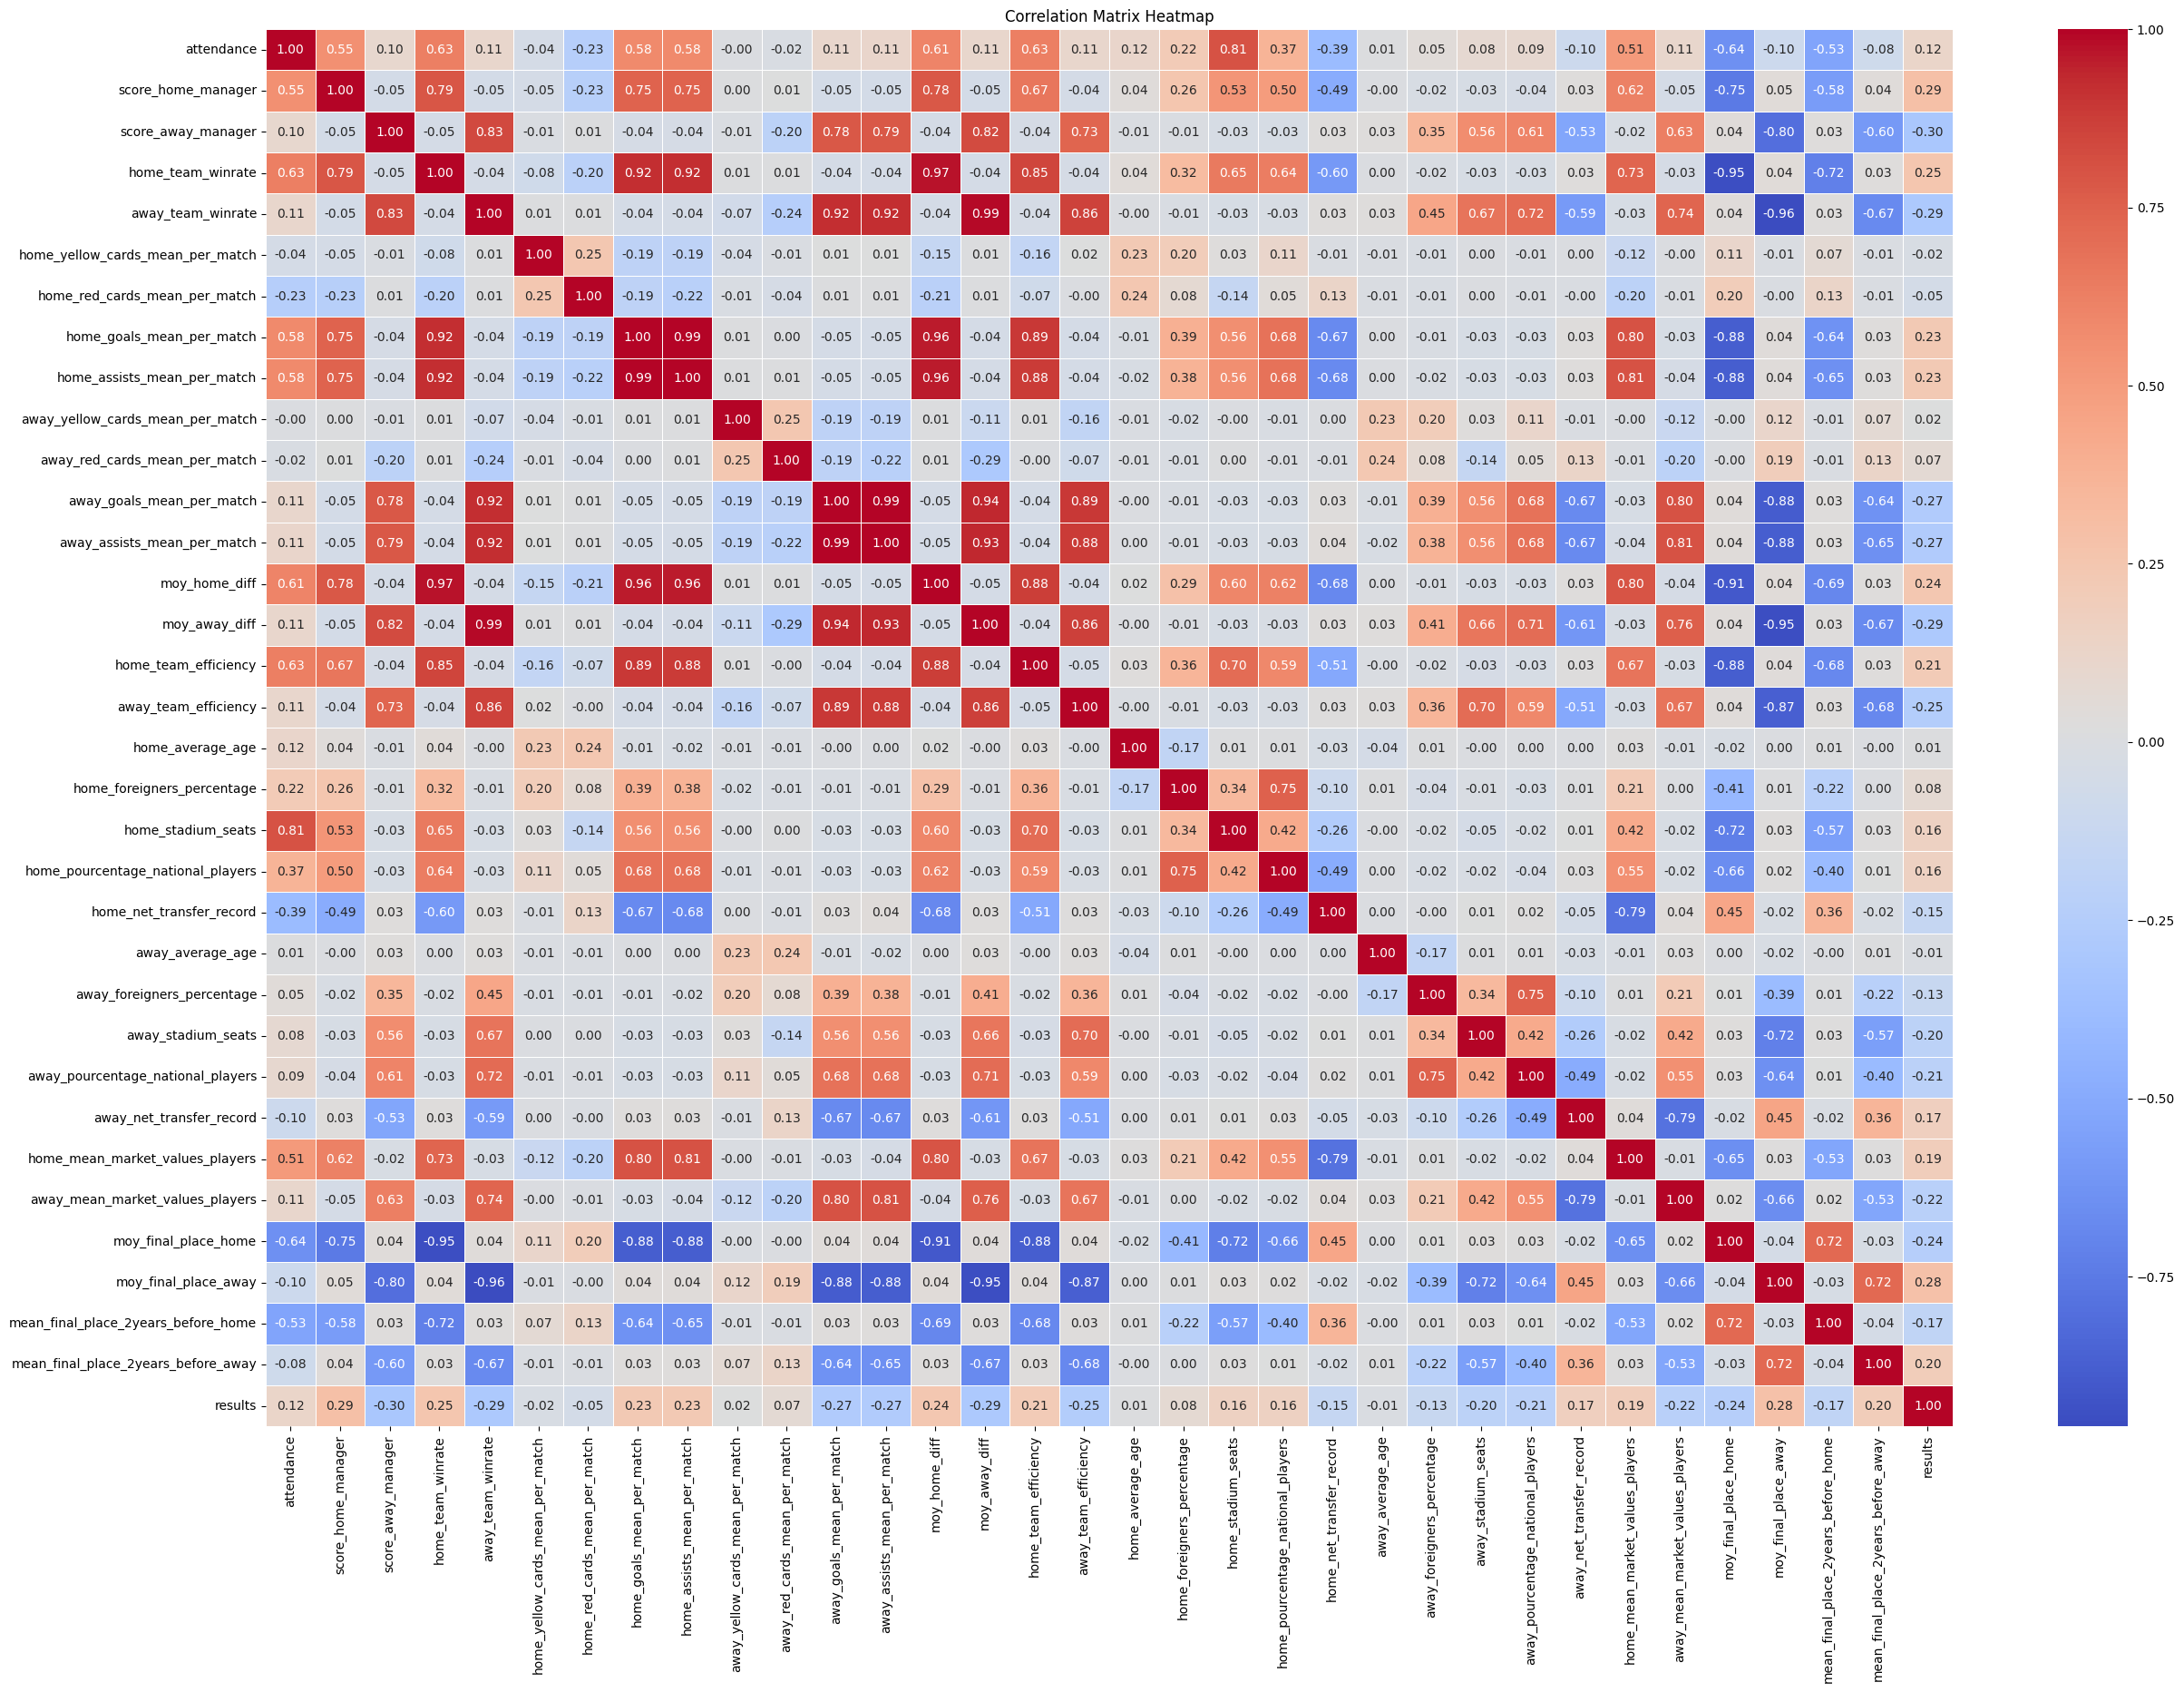

In [113]:
corr = df_features_normalized.drop(columns = ["game_id"]).corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

<p> Beaucoup de variables sont corrélées entre elle, une PCA peut être utile, la dimensionnalité sera sûrement grandement réduite.</p>

In [114]:
corr["results_absolute_value"] = abs(corr["results"])
print(corr["results_absolute_value"].sort_values(ascending=False).tail(20))

away_mean_market_values_players        0.219377
home_team_efficiency                   0.211487
away_pourcentage_national_players      0.209441
mean_final_place_2years_before_away    0.199048
away_stadium_seats                     0.196229
home_mean_market_values_players        0.192608
mean_final_place_2years_before_home    0.173866
away_net_transfer_record               0.173259
home_stadium_seats                     0.161749
home_pourcentage_national_players      0.159390
home_net_transfer_record               0.148625
away_foreigners_percentage             0.130648
attendance                             0.122904
home_foreigners_percentage             0.079954
away_red_cards_mean_per_match          0.070235
home_red_cards_mean_per_match          0.050849
home_yellow_cards_mean_per_match       0.019388
away_yellow_cards_mean_per_match       0.019336
home_average_age                       0.011198
away_average_age                       0.009467
Name: results_absolute_value, dtype: flo

# Préparation des données

<p>La colonne attendance est peu corrélée au résultat et contient des NaN. On décide donc de l'exclure avec d'autres qui sont peu intéressantes pour l'analyse</p>

In [115]:
values_to_drop = [
    "attendance",
    "away_red_cards_mean_per_match",
    "home_red_cards_mean_per_match",
    "home_yellow_cards_mean_per_match",
    "away_yellow_cards_mean_per_match",
    "home_average_age",
    "away_average_age"
]


df_features_normalized.drop(columns=values_to_drop, inplace=True)


In [116]:
df_features_normalized.columns

Index(['score_home_manager', 'score_away_manager', 'home_team_winrate',
       'away_team_winrate', 'home_goals_mean_per_match',
       'home_assists_mean_per_match', 'away_goals_mean_per_match',
       'away_assists_mean_per_match', 'moy_home_diff', 'moy_away_diff',
       'home_team_efficiency', 'away_team_efficiency',
       'home_foreigners_percentage', 'home_stadium_seats',
       'home_pourcentage_national_players', 'home_net_transfer_record',
       'away_foreigners_percentage', 'away_stadium_seats',
       'away_pourcentage_national_players', 'away_net_transfer_record',
       'home_mean_market_values_players', 'away_mean_market_values_players',
       'moy_final_place_home', 'moy_final_place_away',
       'mean_final_place_2years_before_home',
       'mean_final_place_2years_before_away', 'results', 'game_id'],
      dtype='object')

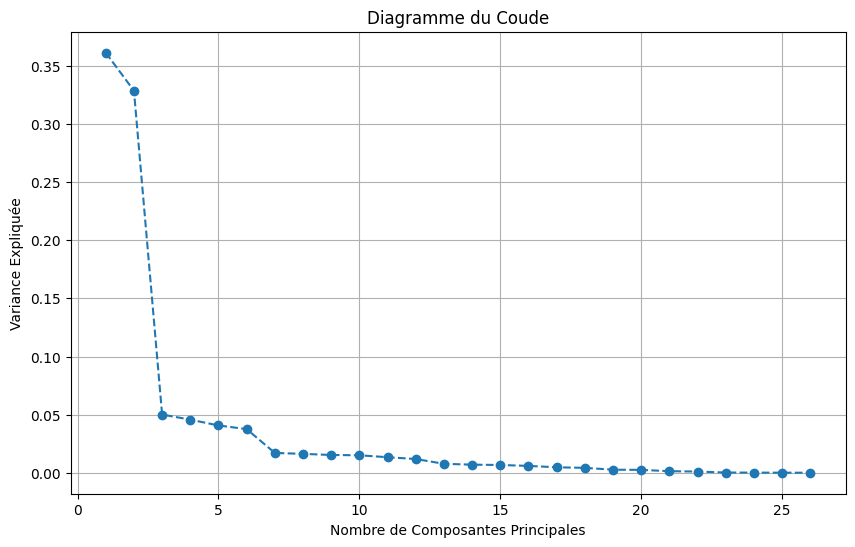

In [117]:
from sklearn.decomposition import PCA
# Supposons que vos données sont dans un DataFrame nommé df_features
features = df_features_normalized.drop(columns=["results"]).columns

# Normalisation des données
pca = PCA()
pca.fit(df_features_normalized.drop(columns=["game_id","results"]))

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Diagramme du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Expliquée')
plt.title('Diagramme du Coude')
plt.grid()
plt.show()

<p>D'après le diagramme ci-dessus on observe une cassure au niveau de 3 composantes, on fait donc le PCA sur 3 coomposantes<p>

In [118]:
n_components = 3  # On choisit 3 composantes principales
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_features_normalized.drop(columns=["game_id","results"]))

# Création d'un DataFrame contenant les composantes principales
df_pca = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])
df_pca["game_id"] = df_features_normalized["game_id"]
df_pca["results"] = df_features_normalized["results"]

if(make_PCA): #Si on veut faire une PCA, on remplace les données normales par les données de la PCA tout en gardant les données pour après
    df_features_normalized_temp = df_features_normalized
    df_features_normalized = df_pca


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features_normalized.drop(columns=["results"]), df_features_normalized["results"], test_size=0.1 ,random_state=39)
#Comme on va utiliser la cross validation pour fine tune les modeles on s'autorise à utiliser 10% du dataset pour le test


# Sélection du modèle

## Séléction d'un premier modèle

<p> Selon <a href = "https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">cette page</a> nous permettant de choisir le meilleur modèle on fait un premier test avec le linear SVC.</p>

In [120]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import optuna 

if not(load_models):

    def objective(trial):
        tol = trial.suggest_float('tol', 0.00001, 0.001, log=True)
        C = trial.suggest_float('C', 0, 3)
        max_iter = trial.suggest_int('max_iter', 800, 1500)


        linear_svc = LinearSVC(tol=tol, C=C, max_iter=max_iter, dual = 'auto')
        #linear_svc.fit(X_train, y_train)
        #accuracy = linear_svc.score(X_test, y_test)
        accuracy = cross_val_score(linear_svc, X_train.drop(columns = ["game_id"]), y_train).mean()
        #accuracy = precision_score(y_test, preds, average='macro')

        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    best_params = study.best_params


    linear_svc = LinearSVC(**best_params, dual = 'auto')
    linear_svc.fit(X_train.drop(columns = ["game_id"]), y_train)

    # on sauve les paramètres du modèle
    if(make_PCA):
        file_linear_svc = "models/model_linear_svc_pca.sav"
    else:
        file_linear_svc = "models/model_linear_svc.sav"
    joblib.dump(linear_svc, file_linear_svc)
else : 
    if(make_PCA):
        linear_svc = joblib.load("models/model_linear_svc_pca.sav")
    else:
        linear_svc = joblib.load("models/model_linear_svc.sav")

In [121]:
train_score = linear_svc.score(X_train.drop(columns = ["game_id"]), y_train)
print("Train score : ", train_score)

Train score :  0.5264305177111717


In [122]:
preds = linear_svc.predict(X_test.drop(columns = ["game_id"]))

In [123]:
test_score = linear_svc.score(X_test.drop(columns = ["game_id"]), y_test)
print(test_score)

0.5857843137254902


### Evaluation du modele

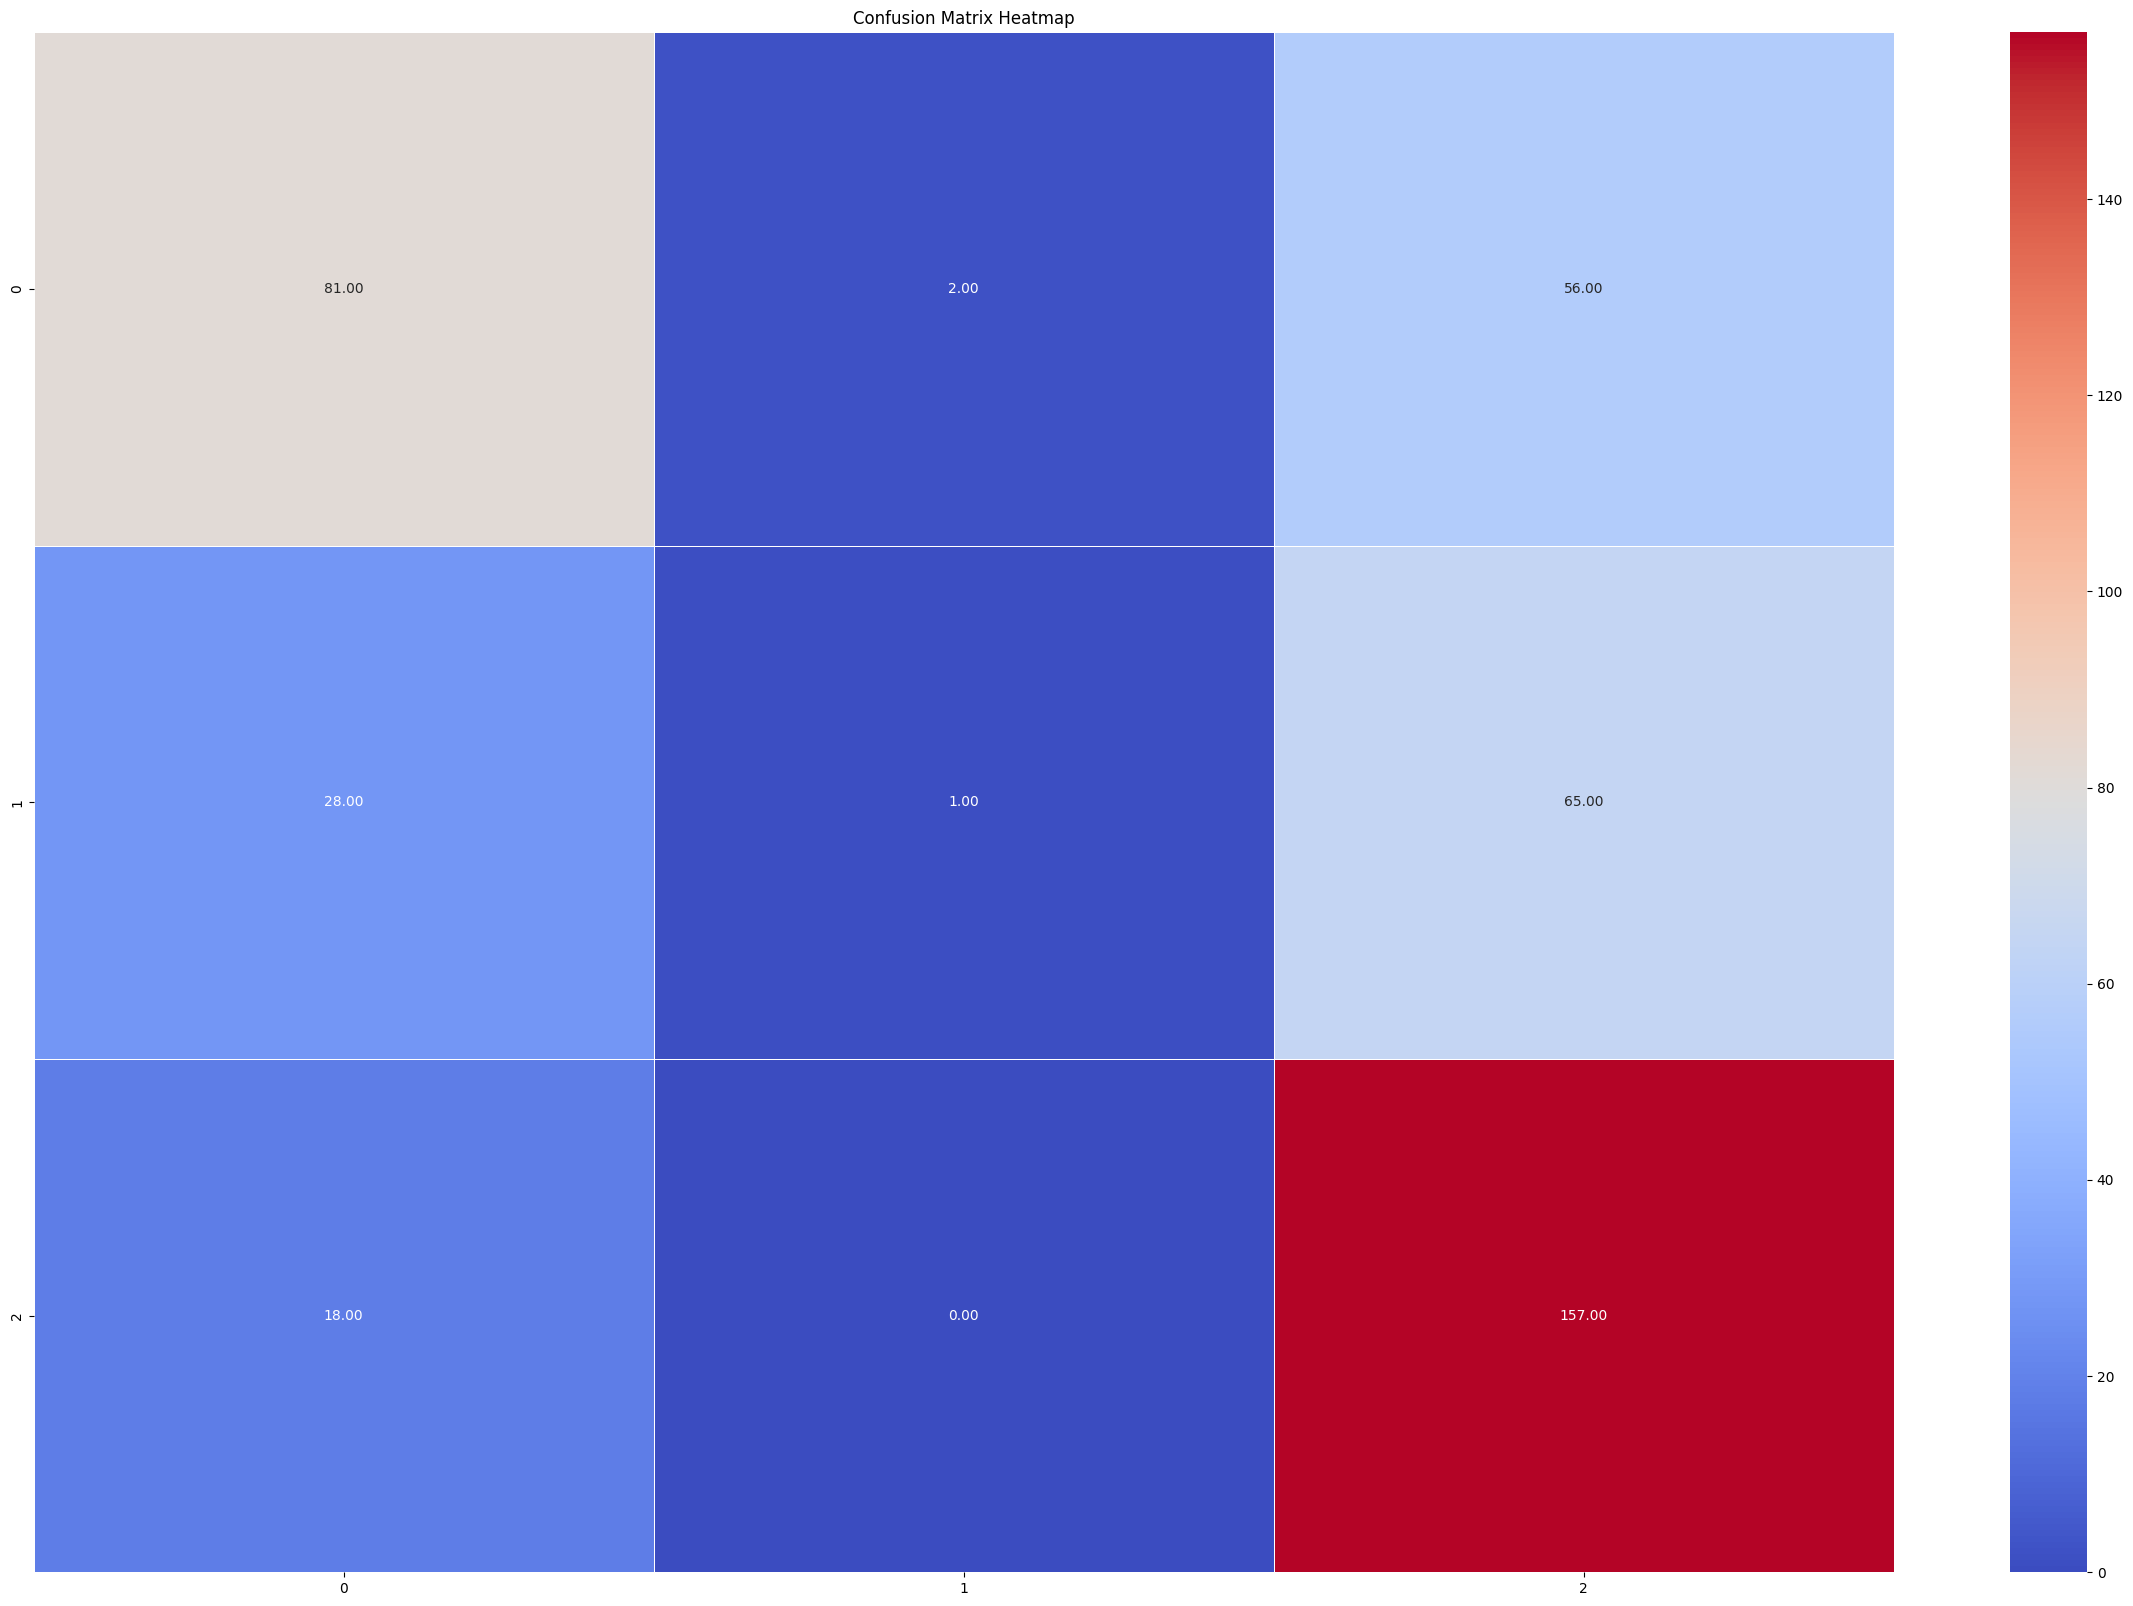

In [124]:
conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Confusion Matrix Heatmap")
plt.show()

In [125]:
print('Precision Micro : ', precision_score(y_test, preds, average='micro'))
print('Precision Macro : ', precision_score(y_test, preds, average='macro'))
print('Precision Weighted : ', precision_score(y_test, preds, average='weighted'))

Precision Micro :  0.5857843137254902
Precision Macro :  0.5119589367875778
Precision Weighted :  0.5363181664024964


In [126]:
print('Recall Micro : ', recall_score(y_test, preds, average='micro'))
print('Recall Macro : ', recall_score(y_test, preds, average='macro'))
print('Recall Weighted : ', recall_score(y_test, preds, average='weighted'))


Recall Micro :  0.5857843137254902
Recall Macro :  0.49683832265494593
Recall Weighted :  0.5857843137254902


In [127]:
print('F1-Score Micro : ', f1_score(y_test, preds, average='micro'))
print('F1-Score Macro : ', f1_score(y_test, preds, average='macro'))
print('F1-Score Weighted : ', f1_score(y_test, preds, average='weighted'))


F1-Score Micro :  0.5857843137254902
F1-Score Macro :  0.4409326153279469
F1-Score Weighted :  0.5095458527556701


In [128]:
accuracy = accuracy_score(y_test, preds)
print("Exactitude:", accuracy)



Exactitude: 0.5857843137254902


In [129]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.64      0.58      0.61       139
           0       0.33      0.01      0.02        94
           1       0.56      0.90      0.69       175

    accuracy                           0.59       408
   macro avg       0.51      0.50      0.44       408
weighted avg       0.54      0.59      0.51       408



<p>Nous avons une performance plus élevée sur le test que sur le train, c'est étonnant mais dû au nombre de données qui n'est pas énorme.</p>

## Selection d'autres modèles

In [130]:
import pycaret.classification as cl

In [131]:
exp_cl = cl.setup(data = df_features_normalized.drop(columns ="game_id"), target = 'results', session_id = 123, train_size=0.8, preprocess=False)

results = cl.compare_models()

# Afficher les résultats de la comparaison
print(results)

,Description,Value
0,Session id,123
1,Target,results
2,Target type,Multiclass
3,Original data shape,"(4078, 28)"
4,Transformed data shape,"(4078, 28)"
5,Transformed train set shape,"(3262, 28)"
6,Transformed test set shape,"(816, 28)"
7,Numeric features,27


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5282,0.0000,0.5282,0.4716,0.4574,0.2251,0.2498,0.0070
lda,Linear Discriminant Analysis,0.5245,0.0000,0.5245,0.4796,0.4757,0.2264,0.2423,0.0080
lr,Logistic Regression,0.5159,0.0000,0.5159,0.4229,0.4326,0.1965,0.2261,0.4400
ada,Ada Boost Classifier,0.5153,0.0000,0.5153,0.4735,0.4683,0.2116,0.2264,0.0410
gbc,Gradient Boosting Classifier,0.5110,0.0000,0.5110,0.4766,0.4767,0.2114,0.2210,0.3300
rf,Random Forest Classifier,0.4853,0.6358,0.4853,0.4627,0.4673,0.1857,0.1891,0.1070
lightgbm,Light Gradient Boosting Machine,0.4764,0.6319,0.4764,0.4506,0.4572,0.1691,0.1721,0.3560
qda,Quadratic Discriminant Analysis,0.4650,0.0000,0.4650,0.4901,0.4720,0.1875,0.1900,0.0080
et,Extra Trees Classifier,0.4494,0.6098,0.4494,0.4369,0.4407,0.1391,0.1400,0.0910
nb,Naive Bayes,0.4421,0.5812,0.4421,0.1954,0.2710,0.0000,0.0000,0.0080


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


<p>Grâce à pycaret nous pouvons avoir une idée des modèles les plus performant sur chaque type d'évaluation.</p>
<p>On choisit d'utiliser le premier trouvé grâce à la cheat sheet de sklearn (linear_svc) ainsi que les 5 premiers en terme d'accuracy (ridge classifier, Linear Discriminant Analysis, Logistic Regression, Ada Boost Classifier et Gradient Boosting Classifier) et ceux ayant le meilleur score dans d'autre metrics (Naive Bayes)</p>

<p>Pour chaque modèle on va optimiser leurs hyperparamètres avec Optuna. C'est une bibliothèque permettant d'automatiser la recherche d'hyperparamètres efficacement.</p>

### Logistic regression 

In [132]:
from sklearn.linear_model import LogisticRegression

if not(load_models):
    def objective(trial):
        tol = trial.suggest_loguniform('tol', 0.00001, 0.001)
        C = trial.suggest_float('C', 0, 3)
        max_iter = trial.suggest_int('max_iter', 50, 300)
        solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])


        lr = LogisticRegression(tol=tol, C=C, max_iter=max_iter, solver=solver)
 
        accuracy = cross_val_score(lr, X_train.drop(columns = ["game_id"]), y_train).mean()

        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    best_params = study.best_params

    lr = LogisticRegression(**best_params)
    lr.fit(X_train.drop(columns = ["game_id"]), y_train)
    if(make_PCA):
        file_lr = "models/model_lr_pca.sav"
    else :
        file_lr = "models/model_lr.sav"
    joblib.dump(lr, file_lr)
else : 
    if(make_PCA):
        lr = joblib.load("models/model_lr_pca.sav")
    else:
        lr = joblib.load("models/model_lr.sav")

In [133]:
train_score = lr.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.526158038147139

In [134]:
preds = lr.predict(X_test.drop(columns = ["game_id"]))
test_score = lr.score(X_test.drop(columns = ["game_id"]), y_test)
test_score

0.5882352941176471

In [135]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.65      0.58      0.61       139
           0       0.33      0.02      0.04        94
           1       0.57      0.90      0.69       175

    accuracy                           0.59       408
   macro avg       0.52      0.50      0.45       408
weighted avg       0.54      0.59      0.52       408



### Ridge Classifier

In [136]:
from sklearn.linear_model import RidgeClassifier

if not(load_models):
    def objective(trial):
        alpha = trial.suggest_loguniform('alpha', 0.01, 10)
        solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
        tol = trial.suggest_loguniform('tol', 0.00001, 0.001)

        ridge = RidgeClassifier(alpha=alpha, solver=solver, tol=tol)
        #ridge.fit(X_train, y_train)
        #accuracy = ridge.score(X_test, y_test)
        accuracy = cross_val_score(ridge, X_train.drop(columns = ["game_id"]), y_train).mean()

        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    best_params = study.best_params


    ridge = RidgeClassifier(**best_params)
    ridge.fit(X_train.drop(columns = ["game_id"]), y_train)
    if(make_PCA):
        file_ridge = "models/model_ridge_pca.sav"
    else:
        file_ridge = "models/model_ridge.sav"
    joblib.dump(ridge, file_ridge)
else:
    if(make_PCA):
        ridge = joblib.load("models/model_ridge_pca.sav")
    else:
        ridge = joblib.load("models/model_ridge.sav")


In [137]:
train_score = ridge.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.5272479564032697

In [138]:
preds = ridge.predict(X_test.drop(columns = ["game_id"]))
test_score = ridge.score(X_test.drop(columns = ["game_id"]), y_test)
test_score

0.5759803921568627

In [139]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.62      0.56      0.59       139
           0       0.25      0.01      0.02        94
           1       0.56      0.89      0.69       175

    accuracy                           0.58       408
   macro avg       0.48      0.49      0.43       408
weighted avg       0.51      0.58      0.50       408



### LDA

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

if not(load_models):
    def objective(trial):
        tol = trial.suggest_loguniform('tol', 0.00001, 0.001)

        lda = LinearDiscriminantAnalysis(tol=tol)
        accuracy = cross_val_score(lda, X_train.drop(columns = ["game_id"]), y_train).mean()

        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=25)
    best_params = study.best_params

    lda = LinearDiscriminantAnalysis(**best_params)
    lda.fit(X_train.drop(columns = ["game_id"]), y_train)
    
    if(make_PCA):
        file_lda = "models/model_lda_pca.sav"
    else:
        file_lda = "models/model_lda.sav"
    joblib.dump(lda, file_lda)
else : 
    if(make_PCA):
        lda = joblib.load("models/model_lda_pca.sav")
    else:
        lda = joblib.load("models/model_lda.sav")

In [141]:
train_score = lda.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.5264305177111717

In [142]:
preds = lda.predict(X_test.drop(columns = ["game_id"]))
test_score = lda.score(X_test.drop(columns = ["game_id"]), y_test)
test_score

0.5686274509803921

In [143]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.64      0.54      0.59       139
           0       0.29      0.07      0.12        94
           1       0.56      0.86      0.68       175

    accuracy                           0.57       408
   macro avg       0.50      0.49      0.46       408
weighted avg       0.53      0.57      0.52       408



### ADA

In [144]:
from sklearn.ensemble import AdaBoostClassifier

if not(load_models):        
    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1)
        algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])

        ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
        #ada.fit(X_train, y_train)
        #accuracy = ada.score(X_train, y_train)
        accuracy = cross_val_score(ada, X_train.drop(columns = ["game_id"]), y_train).mean()

        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    best_params = study.best_params

    ada = AdaBoostClassifier(**best_params)
    ada.fit(X_train.drop(columns = ["game_id"]), y_train)
    if(make_PCA):
        file_ada = "models/model_ada_pca.sav"
    else:
        file_ada = "models/model_ada.sav"
    joblib.dump(ada, file_ada)
else :
    if(make_PCA):
        ada = joblib.load("models/model_ada_pca.sav")
    else:
        ada = joblib.load("models/model_ada.sav")

In [145]:
train_score = ada.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.5335149863760218

In [146]:
preds = ada.predict(X_test.drop(columns = ["game_id"]))
test_score = ada.score(X_test.drop(columns = ["game_id"]), y_test)
test_score 

0.553921568627451

In [147]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.58      0.51      0.54       139
           0       0.27      0.06      0.10        94
           1       0.56      0.85      0.68       175

    accuracy                           0.55       408
   macro avg       0.47      0.48      0.44       408
weighted avg       0.50      0.55      0.50       408



### GBC

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

if not(load_models):
    def objective(trial):
        learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

        gbc = GradientBoostingClassifier(
            loss='log_loss',
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
   

        accuracy = cross_val_score(gbc, X_train.drop(columns = ["game_id"]), y_train).mean()

        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=25)

    # Récupérer les meilleurs hyperparamètres sélectionnés par Optuna
    best_params = study.best_params

    # Créer et entraîner GBC avec les meilleurs hyperparamètres sélectionnés par Optuna

    gbc = GradientBoostingClassifier(**best_params, random_state=42)
    gbc.fit(X_train.drop(columns = ["game_id"]), y_train)

    # Sauvegarder le modèle
    if(make_PCA):
        file_gbc = "models/model_gbc_pca.sav"
    else:
        file_gbc = "models/model_gbc.sav"
    joblib.dump(gbc, file_gbc)
else : 
    if(make_PCA):
        gbc = joblib.load("models/model_gbc_pca.sav")
    else:
        gbc = joblib.load("models/model_gbc.sav")

In [149]:

train_score = gbc.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.5425068119891008

In [150]:
preds = gbc.predict(X_test.drop(columns = ["game_id"]))
test_score = gbc.score(X_test.drop(columns = ["game_id"]), y_test)
test_score

0.571078431372549

In [151]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.62      0.55      0.58       139
           0       0.26      0.05      0.09        94
           1       0.57      0.87      0.69       175

    accuracy                           0.57       408
   macro avg       0.49      0.49      0.45       408
weighted avg       0.52      0.57      0.51       408



### Naive Bayes

In [152]:
from sklearn.naive_bayes import GaussianNB

if not(load_models):
    gnb = GaussianNB()
    gnb.fit(X_train.drop(columns = ["game_id"]), y_train)

    if(make_PCA):
        file_gnb = "models/model_gnb_pca.sav"
    else:
        file_gnb = "models/model_gnb.sav"
    joblib.dump(gnb, file_gnb)
else : 
    if(make_PCA):
        gnb = joblib.load("models/model_gnb_pca.sav")
    else:
        gnb = joblib.load("models/model_gnb.sav")

In [153]:
train_score = gnb.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.46185286103542234

In [154]:
test_score = gnb.score(X_test.drop(columns = ["game_id"]), y_test)
test_score

0.49264705882352944

In [155]:
preds = gnb.predict(X_test.drop(columns = ["game_id"]))

In [156]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.60      0.46      0.52       139
           0       0.28      0.47      0.35        94
           1       0.64      0.53      0.58       175

    accuracy                           0.49       408
   macro avg       0.51      0.49      0.48       408
weighted avg       0.55      0.49      0.51       408



<p>On voit que beaucoup de nos modèles ont du mal à prédire les égalités. Pour essayer de régler ce problème on va essayer de combiner ces modèles.</p>

## Combinaison des modèles

<p> On a 7 modèles ayant une précision à peu près équivalente, on va donc les faire voter entre eux pour qu'ils puissent potentiellement encore gagner en précision.</p>

<p>On détermine quel combinaison de modèle est la plus performante </p>

In [157]:
from sklearn.ensemble import VotingClassifier

def optiSelection(tab_model:list[tuple]): 
    """
    tab_model : list[tuple] : liste de tuple de la forme (modele, nom_du_modele)
    retourne la meilleure combinaison de modele
    """
    maxi = 0
    k = 0
    best_model_str = ""
    k_max = 0
    for i in tab_model:
        vc = VotingClassifier(estimators=i, voting='hard')
        model_str = ""
        for j in i:
            model_str += j[0] + " ; "
        

        accuracy = cross_val_score(vc, X_train.drop(columns = ["game_id"]), y_train).mean()

        if accuracy > maxi:
            maxi = accuracy
            best_vc = i
            best_model_str = model_str
            k_max = k
        
        print(f"try : {k}, model = {model_str}, current model score = {accuracy}, best_score = {maxi}, with model = {best_model_str}, try n°{k_max} ")
        k += 1

    print("Best model : ")
    print(best_model_str + f"with {maxi} accuracy.")
    return best_vc


def powerSet(tab: list[int]) -> list[list[int]]: 

    if len(tab) == 0:
        return[[]]

    first = tab[0]
    rest = tab[1:]

    subsets_noFirst = powerSet(rest)

    subsets_with_First = []
    for i in subsets_noFirst:
        subsets_with_First.append(i + [first])
        subsets_with_First.append(i)
        
    return subsets_with_First

In [158]:
if not(load_models):
    if(make_PCA):
        tab_model = [('gnb_pca', gnb), ('linear_svc_pca', linear_svc), ('gbc_pca', gbc),('ada_pca', ada), ('lda_pca', lda),('lr_pca', lr), ('ridge_pca', ridge)]
    else:
        tab_model = [('gnb', gnb), ('linear_svc', linear_svc), ('gbc', gbc),('ada', ada), ('lda', lda),('lr', lr), ('ridge', ridge)]

    tab_model = powerSet(tab_model)[:-1]
    
    best_vc = optiSelection(tab_model)   
    vc = VotingClassifier(estimators=best_vc, voting='hard')
    vc.fit(X_train.drop(columns = ["game_id"]), y_train)
    if(make_PCA):
        file_vc = "models/model_vc_pca.sav"
    else:
        file_vc = "models/model_vc.sav"
    joblib.dump(vc, file_vc)
else:
    if(make_PCA):
        vc = joblib.load("models/model_vc_pca.sav")
    else:
        vc = joblib.load("models/model_vc.sav")

In [159]:
train_score = vc.score(X_train.drop(columns = ["game_id"]), y_train)
train_score

0.5294277929155313

In [160]:
preds = vc.predict(X_test.drop(columns = ["game_id"]))
test_score = vc.score(X_test.drop(columns = ["game_id"]), y_test)
test_score

0.5784313725490197

In [161]:
print('Classification Report : \n', classification_report(y_test, preds))

Classification Report : 
               precision    recall  f1-score   support

          -1       0.60      0.60      0.60       139
           0       0.42      0.05      0.09        94
           1       0.58      0.84      0.68       175

    accuracy                           0.58       408
   macro avg       0.53      0.50      0.46       408
weighted avg       0.55      0.58      0.52       408



<p>On voit que faire voter les modèles entre eux ont permis une amélioration. En particulier sur les égalités.</p>

# Predictions sur le df de test

In [162]:
df_match_test = pd.read_csv("Clean/match_2023.csv") #Les résultats de chaque match de 2023
df_match_test

,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,competition_type
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,Racing Club de Lens,domestic_league
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,Football Club de Metz,domestic_league
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,Stade Rennais Football Club,domestic_league
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,Olympique Gymnaste Club Nice Côte d'Azur,domestic_league
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,Stade Rennais Football Club,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,Montpellier Hérault Sport Club,domestic_league
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,Olympique de Marseille,domestic_league
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,Stade Rennais Football Club,domestic_league
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,Olympique Gymnaste Club Nice Côte d'Azur,domestic_league


## Merge avec les features créés

In [163]:
#winrate

df_match_test = df_match_test.merge(df_home_winrate, how="left", left_on="home_club_id", right_index=True)
df_match_test = df_match_test.merge(df_away_winrate, how="left", left_on="away_club_id", right_index=True)


In [164]:
#score manager

df_match_test = df_match_test.merge(df_notes_manager_home, how="left", left_on="home_club_manager_name", right_index=True)
df_match_test = df_match_test.merge(df_notes_manager_away, how="left", left_on="away_club_manager_name", right_index=True)

In [165]:
df_indicateurs_equipes

,player_club_id,yellow_cards,red_cards,goals,assists
0,40,1.894595,0.081081,1.216216,0.945946
1,162,1.913514,0.083784,1.732432,1.345946
2,244,1.916667,0.098039,1.519608,1.178922
3,273,1.625000,0.066176,1.335784,1.056373
4,290,1.421053,0.052632,0.842105,0.578947
5,347,2.055046,0.105505,0.931193,0.683486
6,415,2.000000,0.084337,1.063253,0.789157
7,417,1.821078,0.085784,1.223039,0.916667
8,583,1.724816,0.066339,2.302211,1.788698
9,595,2.110526,0.147368,0.984211,0.689474


In [166]:
df_match_test

,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,competition_type,home_team_winrate,away_team_winrate,score_home_manager,score_away_manager
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,Racing Club de Lens,domestic_league,0.705882,-0.039474,NaN,10.921053
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,Football Club de Metz,domestic_league,0.250000,-0.339450,13.157895,NaN
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,Stade Rennais Football Club,domestic_league,0.117647,-0.078431,10.736842,10.451128
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,Olympique Gymnaste Club Nice Côte d'Azur,domestic_league,-0.183486,-0.039409,NaN,NaN
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,Stade Rennais Football Club,domestic_league,0.338235,-0.078431,NaN,9.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,Montpellier Hérault Sport Club,domestic_league,NaN,-0.186275,8.421053,9.210526
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,Olympique de Marseille,domestic_league,-0.012121,0.151961,NaN,9.210526
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,Stade Rennais Football Club,domestic_league,0.705882,-0.078431,NaN,9.894737
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,Olympique Gymnaste Club Nice Côte d'Azur,domestic_league,-0.012121,-0.039409,NaN,NaN


In [167]:
# cartons

df_match_test = pd.merge(df_match_test,df_indicateurs_equipes, how="left", left_on="away_club_id", right_on ="player_club_id")
df_match_test = df_match_test.rename(columns = {"yellow_cards" : "away_yellow_cards_mean_per_match", "red_cards":"away_red_cards_mean_per_match", "goals":"away_goals_mean_per_match", "assists" : "away_assists_mean_per_match"})

df_match_test = pd.merge(df_match_test,df_indicateurs_equipes, how="left", left_on="home_club_id", right_on ="player_club_id")
df_match_test = df_match_test.rename(columns = {"yellow_cards" : "home_yellow_cards_mean_per_match", "red_cards":"home_red_cards_mean_per_match", "goals":"home_goals_mean_per_match", "assists" : "home_assists_mean_per_match"})


In [168]:
df_match_test

,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,...,player_club_id_x,away_yellow_cards_mean_per_match,away_red_cards_mean_per_match,away_goals_mean_per_match,away_assists_mean_per_match,player_club_id_y,home_yellow_cards_mean_per_match,home_red_cards_mean_per_match,home_goals_mean_per_match,home_assists_mean_per_match
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,...,826.0,2.013158,0.078947,1.388158,1.059211,583.0,1.724816,0.066339,2.302211,1.788698
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,...,347.0,2.055046,0.105505,0.931193,0.683486,826.0,2.013158,0.078947,1.388158,1.059211
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,...,273.0,1.625000,0.066176,1.335784,1.056373,969.0,1.705882,0.122549,1.286765,0.941176
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,...,417.0,1.821078,0.085784,1.223039,0.916667,347.0,2.055046,0.105505,0.931193,0.683486
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,...,273.0,1.625000,0.066176,1.335784,1.056373,244.0,1.916667,0.098039,1.519608,1.178922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,...,969.0,1.705882,0.122549,1.286765,0.941176,NaN,NaN,NaN,NaN,NaN
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,...,244.0,1.916667,0.098039,1.519608,1.178922,415.0,2.000000,0.084337,1.063253,0.789157
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,...,273.0,1.625000,0.066176,1.335784,1.056373,583.0,1.724816,0.066339,2.302211,1.788698
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,...,417.0,1.821078,0.085784,1.223039,0.916667,415.0,2.000000,0.084337,1.063253,0.789157


In [169]:
#efficacité des équipes

df_match_test.drop(columns = ["player_club_id_x", "player_club_id_y"], inplace = True)

df_match_test = pd.merge(df_match_test, df_team_efficiency, how = "left", left_on = "home_club_id", right_on = "player_club_id").rename(columns= {"efficiency_times_n_match":"home_team_efficiency"})
df_match_test = pd.merge(df_match_test, df_team_efficiency, how = "left", left_on = "away_club_id", right_on = "player_club_id").rename(columns= {"efficiency_times_n_match":"away_team_efficiency"})
df_match_test.drop(columns = ["player_club_id_x"], inplace = True)
df_match_test.drop(columns = ["player_club_id_y"], inplace = True)

In [170]:
#transfert

df_match_test = pd.merge(df_match_test, df_clubs_useful_columns, how = "left", left_on = "home_club_id", right_on = "club_id").rename(columns = {"average_age":"home_average_age", "foreigners_percentage":"home_foreigners_percentage", "stadium_seats":"home_stadium_seats", "pourcentage_national_players":"home_pourcentage_national_players", "net_transfer_record" : "home_net_transfer_record"}).drop(columns=["club_id"])
df_match_test = pd.merge(df_match_test, df_clubs_useful_columns, how = "left", left_on = "away_club_id", right_on = "club_id").rename(columns = {"average_age":"away_average_age", "foreigners_percentage":"away_foreigners_percentage", "stadium_seats":"away_stadium_seats", "pourcentage_national_players":"away_pourcentage_national_players", "net_transfer_record" : "away_net_transfer_record"}).drop(columns=["club_id"])

In [171]:
# Ajoute de la colonne season

df_match_test["season"] = np.ones(df_match_test["game_id"].count()) * 2023

In [172]:
# Valeurs des joueurs/équipes

df_match_test = pd.merge(df_match_test, df_mean_market_value_per_year, how = "left", left_on = ["home_club_id", "season"], right_on = ["current_club_id", "season"]).drop(columns = ["current_club_id"]).rename(columns = {"market_value_in_eur" : "home_mean_market_values_players"})
df_match_test = pd.merge(df_match_test, df_mean_market_value_per_year, how = "left", left_on = ["away_club_id", "season"], right_on = ["current_club_id", "season"]).drop(columns = ["current_club_id"]).rename(columns = {"market_value_in_eur" : "away_mean_market_values_players"})

In [173]:
# Goal-Average

df_match_test = df_match_test.merge(df_goal_diff, how="left", left_on="home_club_id", right_on="club_id")
df_match_test.drop(columns=["club_id", "moy_away_diff"], inplace=True)
df_match_test = df_match_test.merge(df_goal_diff, how="left", left_on="away_club_id", right_on="club_id")
df_match_test.drop(columns=["club_id", "moy_home_diff_y"], inplace=True)

df_match_test.rename(columns={"moy_home_diff_x": "moy_home_diff"}, inplace=True)


In [174]:
#position moyenne
df_match_test = pd.merge(df_match_test, df_moy_pos_home, how="left", on="home_club_id")
df_match_test = pd.merge(df_match_test, df_moy_pos_away, how="left", on="away_club_id")

In [175]:
#position moyenne les 2 dernières années

df_mean_place_2years_before2021_2022 = df_final_place_home.reset_index()[df_final_place_home.reset_index()["season"] >= 2021].groupby("home_club_id").mean().drop(columns = ["season"]).reset_index()
df_mean_place_2years_before2021_2022.rename(columns = {"final_place_home" : "mean_final_place_2years_before", "home_club_id" : "club_id"}, inplace = True)
df_mean_place_2years_before2021_2022


,club_id,mean_final_place_2years_before
0,40,20.0
1,162,4.0
2,244,2.5
3,273,4.5
4,290,17.0
5,347,18.0
6,415,13.0
7,417,7.5
8,583,1.0
9,618,19.0


In [176]:

df_match_test = pd.merge(df_match_test, df_mean_place_2years_before2021_2022, how = "left", left_on = "home_club_id", right_on = "club_id")
df_match_test.rename(columns = {"mean_final_place_2years_before" : "mean_final_place_2years_before_home"}, inplace = True)
df_match_test.drop(columns = ["club_id"], inplace = True)

df_match_test = pd.merge(df_match_test, df_mean_place_2years_before2021_2022, how = "left", left_on = "away_club_id", right_on = "club_id")
df_match_test.rename(columns = {"mean_final_place_2years_before" : "mean_final_place_2years_before_away"}, inplace = True)
df_match_test.drop(columns = ["club_id"], inplace = True)

In [177]:
print(len(df_match_test.columns))
df_match_test.columns
df_match_test

45


,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,...,away_net_transfer_record,season,home_mean_market_values_players,away_mean_market_values_players,moy_home_diff,moy_away_diff,moy_final_place_home,moy_final_place_away,mean_final_place_2years_before_home,mean_final_place_2years_before_away
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,...,3600000.0,2023.0,2.548788e+07,5.326613e+06,2.049261,-0.131579,1.181818,8.750000,1.0,4.5
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,...,23700000.0,2023.0,5.326613e+06,1.054722e+06,0.460526,-0.926606,9.000000,16.166667,4.5,18.0
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,...,62100000.0,2023.0,1.797222e+06,6.993182e+06,0.333333,-0.073529,9.818182,7.545455,12.5,4.5
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,...,-33600000.0,2023.0,1.054722e+06,5.823077e+06,-0.458716,-0.152709,16.000000,7.818182,18.0,7.5
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,...,62100000.0,2023.0,5.934122e+06,6.993182e+06,0.661765,-0.073529,4.636364,7.545455,2.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,...,28600000.0,2023.0,2.195588e+06,1.797222e+06,NaN,-0.382353,NaN,10.454545,NaN,12.5
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,...,-30200000.0,2023.0,1.581343e+06,5.934122e+06,0.005988,0.254902,14.666667,4.818182,13.0,2.5
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,...,62100000.0,2023.0,2.548788e+07,6.993182e+06,2.049261,-0.073529,1.181818,7.545455,1.0,4.5
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,...,-33600000.0,2023.0,1.581343e+06,5.823077e+06,0.005988,-0.152709,14.666667,7.818182,13.0,7.5


## Sélection des features

In [178]:
if make_PCA:
    df_features_normalized = df_features_normalized_temp

missing_columns = [col for col in df_features_normalized.columns if col not in df_match_test.columns]
print("Colonnes manquantes dans df_match_test :", missing_columns)
df_match_test


Colonnes manquantes dans df_match_test : ['results']


,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,...,away_net_transfer_record,season,home_mean_market_values_players,away_mean_market_values_players,moy_home_diff,moy_away_diff,moy_final_place_home,moy_final_place_away,mean_final_place_2years_before_home,mean_final_place_2years_before_away
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,...,3600000.0,2023.0,2.548788e+07,5.326613e+06,2.049261,-0.131579,1.181818,8.750000,1.0,4.5
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,...,23700000.0,2023.0,5.326613e+06,1.054722e+06,0.460526,-0.926606,9.000000,16.166667,4.5,18.0
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,...,62100000.0,2023.0,1.797222e+06,6.993182e+06,0.333333,-0.073529,9.818182,7.545455,12.5,4.5
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,...,-33600000.0,2023.0,1.054722e+06,5.823077e+06,-0.458716,-0.152709,16.000000,7.818182,18.0,7.5
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,...,62100000.0,2023.0,5.934122e+06,6.993182e+06,0.661765,-0.073529,4.636364,7.545455,2.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,...,28600000.0,2023.0,2.195588e+06,1.797222e+06,NaN,-0.382353,NaN,10.454545,NaN,12.5
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,...,-30200000.0,2023.0,1.581343e+06,5.934122e+06,0.005988,0.254902,14.666667,4.818182,13.0,2.5
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,...,62100000.0,2023.0,2.548788e+07,6.993182e+06,2.049261,-0.073529,1.181818,7.545455,1.0,4.5
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,...,-33600000.0,2023.0,1.581343e+06,5.823077e+06,0.005988,-0.152709,14.666667,7.818182,13.0,7.5


In [179]:
df_features_2023 = df_match_test.loc[:, df_features_normalized.drop(columns = ["results"]).columns]
df_features_2023.count()


score_home_manager                     172
score_away_manager                     170
home_team_winrate                      255
away_team_winrate                      255
home_goals_mean_per_match              255
home_assists_mean_per_match            255
away_goals_mean_per_match              255
away_assists_mean_per_match            255
moy_home_diff                          255
moy_away_diff                          255
home_team_efficiency                   255
away_team_efficiency                   255
home_foreigners_percentage             270
home_stadium_seats                     270
home_pourcentage_national_players      270
home_net_transfer_record               270
away_foreigners_percentage             270
away_stadium_seats                     270
away_pourcentage_national_players      270
away_net_transfer_record               270
home_mean_market_values_players        270
away_mean_market_values_players        270
moy_final_place_home                   255
moy_final_p

## Prise en charge des colonnes contenant des NaN

In [180]:
print(df_features_2023.columns[df_features_2023.isna().any()])

Index(['score_home_manager', 'score_away_manager', 'home_team_winrate',
       'away_team_winrate', 'home_goals_mean_per_match',
       'home_assists_mean_per_match', 'away_goals_mean_per_match',
       'away_assists_mean_per_match', 'moy_home_diff', 'moy_away_diff',
       'home_team_efficiency', 'away_team_efficiency', 'moy_final_place_home',
       'moy_final_place_away', 'mean_final_place_2years_before_home',
       'mean_final_place_2years_before_away'],
      dtype='object')


### Score manager 
<p> La note du manager inconnu sera la moyenne des notes des anciens managers du club </p>

In [181]:
df_coach_score_filler_home = df_match_train[["home_club_id", "score_home_manager"]].groupby("home_club_id").mean().reset_index()
df_coach_score_filler_away = df_match_train[["away_club_id", "score_away_manager"]].groupby("away_club_id").mean().reset_index()

df_coach_score_filler_home

,home_club_id,score_home_manager
0,40,11.439645
1,162,13.248459
2,244,12.113003
3,273,11.371566
4,290,9.985226
5,347,9.544664
6,415,9.991709
7,417,11.665261
8,583,15.899123
9,595,10.805540


In [182]:
# club ayant une note de manager
df_match_test[["home_club_id", "score_home_manager"]].dropna().groupby("home_club_id").mean().reset_index()

,home_club_id,score_home_manager
0,244,11.315789
1,273,12.821053
2,667,11.578947
3,738,8.421053
4,826,13.157895
5,969,10.736842
6,995,10.259503
7,1041,16.052632
8,1082,15.789474
9,1158,11.578947


In [183]:
df_score_home_coach_filled = pd.concat([df_match_test[["home_club_id", "score_home_manager"]].dropna().groupby("home_club_id").mean().reset_index(), df_coach_score_filler_home])
df_score_home_coach_filled

,home_club_id,score_home_manager
0,244,11.315789
1,273,12.821053
2,667,11.578947
3,738,8.421053
4,826,13.157895
5,969,10.736842
6,995,10.259503
7,1041,16.052632
8,1082,15.789474
9,1158,11.578947


In [184]:
df_score_home_coach_filled.drop_duplicates(subset=["home_club_id"], keep='first', inplace=True)
 #on garde la première note de manager pour chaque club car ce sont celles qui n'ont pas besoin d'être remplacées

In [185]:
df_match_test.drop(columns=["score_home_manager"], inplace=True)
df_match_test = pd.merge(df_match_test, df_score_home_coach_filled, how="left", on="home_club_id")
df_match_test

,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,...,season,home_mean_market_values_players,away_mean_market_values_players,moy_home_diff,moy_away_diff,moy_final_place_home,moy_final_place_away,mean_final_place_2years_before_home,mean_final_place_2years_before_away,score_home_manager
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,...,2023.0,2.548788e+07,5.326613e+06,2.049261,-0.131579,1.181818,8.750000,1.0,4.5,15.899123
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,...,2023.0,5.326613e+06,1.054722e+06,0.460526,-0.926606,9.000000,16.166667,4.5,18.0,13.157895
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,...,2023.0,1.797222e+06,6.993182e+06,0.333333,-0.073529,9.818182,7.545455,12.5,4.5,10.736842
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,...,2023.0,1.054722e+06,5.823077e+06,-0.458716,-0.152709,16.000000,7.818182,18.0,7.5,9.544664
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,...,2023.0,5.934122e+06,6.993182e+06,0.661765,-0.073529,4.636364,7.545455,2.5,4.5,11.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,...,2023.0,2.195588e+06,1.797222e+06,NaN,-0.382353,NaN,10.454545,NaN,12.5,8.421053
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,...,2023.0,1.581343e+06,5.934122e+06,0.005988,0.254902,14.666667,4.818182,13.0,2.5,9.991709
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,...,2023.0,2.548788e+07,6.993182e+06,2.049261,-0.073529,1.181818,7.545455,1.0,4.5,15.899123
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,...,2023.0,1.581343e+06,5.823077e+06,0.005988,-0.152709,14.666667,7.818182,13.0,7.5,9.991709


In [186]:
print(df_match_test.count())

game_id                                270
date                                   270
home_club_id                           270
away_club_id                           270
home_club_manager_name                 270
away_club_manager_name                 270
stadium                                270
attendance                             266
referee                                270
home_club_name                         270
away_club_name                         270
competition_type                       270
home_team_winrate                      255
away_team_winrate                      255
score_away_manager                     170
away_yellow_cards_mean_per_match       255
away_red_cards_mean_per_match          255
away_goals_mean_per_match              255
away_assists_mean_per_match            255
home_yellow_cards_mean_per_match       255
home_red_cards_mean_per_match          255
home_goals_mean_per_match              255
home_assists_mean_per_match            255
home_team_e

In [187]:
df_score_away_coach_filled = pd.concat([df_match_test[["away_club_id", "score_away_manager"]].dropna().groupby("away_club_id").mean().reset_index(), df_coach_score_filler_away])

df_score_away_coach_filled.drop_duplicates(subset=["away_club_id"], keep='first', inplace=True)

df_match_test.drop(columns=["score_away_manager"], inplace=True)
df_match_test = pd.merge(df_match_test, df_score_away_coach_filled, how="left", on="away_club_id")
df_match_test

,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,...,home_mean_market_values_players,away_mean_market_values_players,moy_home_diff,moy_away_diff,moy_final_place_home,moy_final_place_away,mean_final_place_2years_before_home,mean_final_place_2years_before_away,score_home_manager,score_away_manager
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,...,2.548788e+07,5.326613e+06,2.049261,-0.131579,1.181818,8.750000,1.0,4.5,15.899123,10.921053
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,...,5.326613e+06,1.054722e+06,0.460526,-0.926606,9.000000,16.166667,4.5,18.0,13.157895,7.484629
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,...,1.797222e+06,6.993182e+06,0.333333,-0.073529,9.818182,7.545455,12.5,4.5,10.736842,10.080201
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,...,1.054722e+06,5.823077e+06,-0.458716,-0.152709,16.000000,7.818182,18.0,7.5,9.544664,9.486838
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,...,5.934122e+06,6.993182e+06,0.661765,-0.073529,4.636364,7.545455,2.5,4.5,11.315789,10.080201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4094819,2024-03-31,738,969,Luka Elsner,Michel Der Zakarian,Stade Océane,20556.0,Mathieu Vernice,Le Havre Athletic Club,...,2.195588e+06,1.797222e+06,NaN,-0.382353,NaN,10.454545,NaN,12.5,8.421053,9.210526
266,4094840,2024-04-21,415,244,Carles Martínez,Jean-Louis Gasset,Stadium Municipal,29809.0,Clément Turpin,Toulouse Football Club,...,1.581343e+06,5.934122e+06,0.005988,0.254902,14.666667,4.818182,13.0,2.5,9.991709,9.210526
267,4094776,2024-02-25,583,273,Luis Enrique,Julien Stéphan,Parc des Princes,47874.0,Bastien Dechepy,Paris Saint-Germain Football Club,...,2.548788e+07,6.993182e+06,2.049261,-0.073529,1.181818,7.545455,1.0,4.5,15.899123,10.080201
268,4094786,2024-03-03,415,417,Carles Martínez,Francesco Farioli,Stadium Municipal,25507.0,Jérémie Pignard,Toulouse Football Club,...,1.581343e+06,5.823077e+06,0.005988,-0.152709,14.666667,7.818182,13.0,7.5,9.991709,9.486838


### Team winrate
<p> Si une équipe n'a pas de winrate ça veut dire qu'elle n'a pas été en ligue1, on mettra donc son winrate à 0.

In [188]:
df_match_test.fillna(pd.DataFrame(np.zeros((df_match_test.count().iloc[0],2)), columns = ["home_team_winrate", "away_team_winrate"]), inplace = True)

In [189]:
df_match_test[['home_team_winrate', 'away_team_winrate']].isna().sum()

home_team_winrate    0
away_team_winrate    0
dtype: int64

In [190]:
df_match_test.count()

game_id                                270
date                                   270
home_club_id                           270
away_club_id                           270
home_club_manager_name                 270
away_club_manager_name                 270
stadium                                270
attendance                             266
referee                                270
home_club_name                         270
away_club_name                         270
competition_type                       270
home_team_winrate                      270
away_team_winrate                      270
away_yellow_cards_mean_per_match       255
away_red_cards_mean_per_match          255
away_goals_mean_per_match              255
away_assists_mean_per_match            255
home_yellow_cards_mean_per_match       255
home_red_cards_mean_per_match          255
home_goals_mean_per_match              255
home_assists_mean_per_match            255
home_team_efficiency                   255
away_team_e

In [191]:
missing_data_clubs = df_match_test[df_match_test['away_yellow_cards_mean_per_match'].isna()]['home_club_id'].unique()

### Reste du remplissage pour les valeurs nulles
<p>Cherchons toutes les colonnes qui necessitent un remplissage<p>

In [192]:
columns_with_missing_values = df_match_test.columns[df_match_test.isnull().sum() > 0]
columns_with_missing_values

Index(['attendance', 'away_yellow_cards_mean_per_match',
       'away_red_cards_mean_per_match', 'away_goals_mean_per_match',
       'away_assists_mean_per_match', 'home_yellow_cards_mean_per_match',
       'home_red_cards_mean_per_match', 'home_goals_mean_per_match',
       'home_assists_mean_per_match', 'home_team_efficiency',
       'away_team_efficiency', 'moy_home_diff', 'moy_away_diff',
       'moy_final_place_home', 'moy_final_place_away',
       'mean_final_place_2years_before_home',
       'mean_final_place_2years_before_away'],
      dtype='object')

In [193]:
missing_data_clubs = df_match_test[df_match_test['home_yellow_cards_mean_per_match'].isna()]['home_club_id'].unique()
missing_data_clubs

array([738], dtype=int64)

<p>On sait maintenant que c'est à cause du club d'ID 738 qui est probablement monté en ligue 1 
pour la première fois depuis 2013 qu'il nous manque des valeurs<p>

<p> On peut donc remplir les valeurs seulement pour ce club <p>
<p> On va remplacer ses valeurs nulles par les valeurs de l'équipe placée environ dans le top 75%<p>

In [194]:
common_columns = set(columns_with_missing_values).intersection(df_features_2023)
print(common_columns)

{'moy_home_diff', 'home_goals_mean_per_match', 'moy_final_place_away', 'home_assists_mean_per_match', 'away_assists_mean_per_match', 'mean_final_place_2years_before_home', 'home_team_efficiency', 'mean_final_place_2years_before_away', 'away_goals_mean_per_match', 'moy_away_diff', 'moy_final_place_home', 'away_team_efficiency'}


In [195]:

def Remplacer_valeurs_nulles(column1,column2):
    df = df_match_test[[column1, column2]]
    df.drop_duplicates(subset=[column2], keep='first', inplace=True) #on garde la première note car elles sont toutes les mêmes
    df.dropna(inplace=True)

    df_sorted = df.sort_values(by=column2, ascending=False)

    value = df_sorted[column2].quantile(0.25)

    df_match_test.loc[df_match_test[column1] == 738, column2] = value

def Remplacer_valeurs_nulles_decroissantes(column1,column2): # on crée cette fonction car plus la position finale est basse plus l'équipe est forte par exemple
    df = df_match_test[[column1, column2]]
    df.drop_duplicates(subset=[column2], keep='first', inplace=True) #on garde la première note car elles sont toutes les mêmes
    df.dropna(inplace=True)

    df_sorted = df.sort_values(by=column2, ascending=False)

    value = df_sorted[column2].quantile(0.25)

    df_match_test.loc[df_match_test[column1] == 738, column2] = value

Remplacer_valeurs_nulles("home_club_id", "home_team_efficiency")
Remplacer_valeurs_nulles("away_club_id", "away_team_efficiency")
Remplacer_valeurs_nulles_decroissantes("home_club_id", "moy_final_place_home")
Remplacer_valeurs_nulles_decroissantes("away_club_id", "moy_final_place_away")
Remplacer_valeurs_nulles("away_club_id", "away_goals_mean_per_match")
Remplacer_valeurs_nulles("home_club_id", "home_goals_mean_per_match")
Remplacer_valeurs_nulles("away_club_id", "away_assists_mean_per_match")
Remplacer_valeurs_nulles("home_club_id", "home_assists_mean_per_match")
Remplacer_valeurs_nulles("away_club_id", "moy_away_diff")
Remplacer_valeurs_nulles("home_club_id", "moy_home_diff")
Remplacer_valeurs_nulles_decroissantes("home_club_id", "mean_final_place_2years_before_home")
Remplacer_valeurs_nulles_decroissantes("away_club_id", "mean_final_place_2years_before_away")



In [196]:
print(df_match_test.count())

game_id                                270
date                                   270
home_club_id                           270
away_club_id                           270
home_club_manager_name                 270
away_club_manager_name                 270
stadium                                270
attendance                             266
referee                                270
home_club_name                         270
away_club_name                         270
competition_type                       270
home_team_winrate                      270
away_team_winrate                      270
away_yellow_cards_mean_per_match       255
away_red_cards_mean_per_match          255
away_goals_mean_per_match              270
away_assists_mean_per_match            270
home_yellow_cards_mean_per_match       255
home_red_cards_mean_per_match          255
home_goals_mean_per_match              270
home_assists_mean_per_match            270
home_team_efficiency                   270
away_team_e

In [197]:
df_features_2023 = df_match_test.loc[:, df_features_normalized.drop(columns = "results").columns]
df_features_2023.count()

score_home_manager                     270
score_away_manager                     270
home_team_winrate                      270
away_team_winrate                      270
home_goals_mean_per_match              270
home_assists_mean_per_match            270
away_goals_mean_per_match              270
away_assists_mean_per_match            270
moy_home_diff                          270
moy_away_diff                          270
home_team_efficiency                   270
away_team_efficiency                   270
home_foreigners_percentage             270
home_stadium_seats                     270
home_pourcentage_national_players      270
home_net_transfer_record               270
away_foreigners_percentage             270
away_stadium_seats                     270
away_pourcentage_national_players      270
away_net_transfer_record               270
home_mean_market_values_players        270
away_mean_market_values_players        270
moy_final_place_home                   270
moy_final_p

<p>On a donc notre dataset sans NaN, on va pouvoir le normaliser et faire nos prédictions.</p>

## Prédictions sur les données de 2023

In [198]:
df_features_2023_normalized = pd.DataFrame(scaler.fit_transform(df_features_2023.drop(columns = ["game_id"])), columns=df_features_2023.drop(columns = ["game_id"]).columns)
df_features_2023_normalized["game_id"] = df_features_2023["game_id"]
if(make_PCA):
    n_components = 3  # On choisit 3 composantes principales
    pca = PCA(n_components=n_components)
    
    principal_components = pca.fit_transform(df_features_2023_normalized.drop(columns = ["game_id"]))
    df_pca = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])
    df_pca["game_id"] = df_features_2023_normalized["game_id"]
    df_features_2023_normalized = df_pca


In [199]:
final_preds = vc.predict(df_features_2023_normalized.drop(columns = ["game_id"]))
final_preds

array([ 1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  0, -1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  0,  0,  1, -1,  1, -1,  1, -1,  1, -1,  0,  1,  1,  1, -1,
        1,  0,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1, -1, -1,  1,  1, -1,  0,  1,  1, -1,  1, -1, -1, -1,  1,
       -1,  0, -1, -1, -1, -1,  0,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  0, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  0,  1,  1,  1,  0,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1, -1,  1,
       -1,  1,  1,  1,  1

In [200]:
preds = pd.DataFrame(pd.concat([df_features_2023_normalized["game_id"],pd.Series(final_preds)], axis = 1)).rename(columns = {0:"results"})
preds

,game_id,results
0,4094596,1
1,4094622,1
2,4094630,1
3,4094647,-1
4,4094696,1
...,...,...
265,4094819,-1
266,4094840,-1
267,4094776,1
268,4094786,0


In [201]:
preds.to_csv("preds.csv", index=False)

<p>Vous pouvez maintenant regarder les prédictions dans le fichier preds.csv qui a dû être crée.</p>